# **Import Library 📚**

In [1]:
# import libraries for machine learning classification

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import sklearn
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
import psycopg2

# **Establish Connection to Database ☁️**

In [2]:
# Replace these with your actual database credentials
dbname = "lvqpozlu"
user = "lvqpozlu"
password = "odGCNoUaSQWgj4AJg7J124dKsgnICxlA"
host = "rosie.db.elephantsql.com"
port = "5432"

connection = psycopg2.connect(dbname=dbname, user=user, password=password, host=host, port=port)

# **Importing Data from Database ⬇️**

## Commodity Data

In [3]:
query = "SELECT * FROM commodities_data;"
data1 = pd.read_sql_query(query, connection)
data1.drop('id', axis=1, inplace=True)

C:\Users\LEGION\AppData\Local\Temp\ipykernel_11480\3726709819.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data1 = pd.read_sql_query(query, connection)


In [4]:
data1

,date,value
0,2023-01-01,182.636277
1,2023-02-01,174.561286
2,2023-03-01,168.300259
3,2023-04-01,170.764655
4,2023-05-01,157.134012
5,2023-06-01,154.069169
6,2023-07-01,157.908976
7,2023-08-01,161.306193
8,2023-09-01,168.657489
9,2023-10-01,167.770644


In [5]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    10 non-null     datetime64[ns]
 1   value   10 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 292.0 bytes


## Weather Data

In [6]:
query = "SELECT * FROM weather_data;"
data2 = pd.read_sql_query(query, connection)
data2.drop('id', axis=1, inplace=True)

C:\Users\LEGION\AppData\Local\Temp\ipykernel_11480\185825285.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data2 = pd.read_sql_query(query, connection)


In [7]:
data2

,datetime,temperature,dew_point,relative_humidity,wind_speed,precipitation,cloud_cover,conditions
0,2023-01-01,11.0,7.9,82.24,14.2,0.10,47.7,"Rain, Partially cloudy"
1,2023-01-02,10.5,6.8,79.25,14.7,0.00,87.8,Overcast
2,2023-01-03,15.1,11.3,78.49,28.5,0.00,90.7,Overcast
3,2023-01-04,15.3,12.8,85.43,22.8,0.00,85.1,Overcast
4,2023-01-05,13.5,7.8,70.43,20.2,0.00,75.8,Overcast
...,...,...,...,...,...,...,...,...
321,2023-11-18,12.8,4.9,62.37,31.4,0.47,38.1,"Rain, Partially cloudy"
322,2023-11-19,9.7,-1.9,46.61,20.0,0.00,0.9,Clear
323,2023-11-20,7.1,-1.5,55.23,17.2,0.00,55.1,Partially cloudy
324,2023-11-21,8.9,5.6,80.39,25.9,42.05,97.6,"Rain, Overcast"


In [8]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 326 entries, 0 to 325
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   datetime           326 non-null    datetime64[ns]
 1   temperature        326 non-null    float64       
 2   dew_point          326 non-null    float64       
 3   relative_humidity  326 non-null    float64       
 4   wind_speed         326 non-null    float64       
 5   precipitation      326 non-null    float64       
 6   cloud_cover        326 non-null    float64       
 7   conditions         326 non-null    object        
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 20.5+ KB


# **Merging the data1 (commodity) and data2 (weather) into One Dataframe 📅**

In [9]:
# merge data1 and data2 on the same month

data = pd.merge(data1, data2, left_on=data1['date'].dt.month, right_on=data2['datetime'].dt.month)
data

,key_0,date,value,datetime,temperature,dew_point,relative_humidity,wind_speed,precipitation,cloud_cover,conditions
0,1,2023-01-01,182.636277,2023-01-01,11.0,7.9,82.24,14.2,0.10,47.7,"Rain, Partially cloudy"
1,1,2023-01-01,182.636277,2023-01-02,10.5,6.8,79.25,14.7,0.00,87.8,Overcast
2,1,2023-01-01,182.636277,2023-01-03,15.1,11.3,78.49,28.5,0.00,90.7,Overcast
3,1,2023-01-01,182.636277,2023-01-04,15.3,12.8,85.43,22.8,0.00,85.1,Overcast
4,1,2023-01-01,182.636277,2023-01-05,13.5,7.8,70.43,20.2,0.00,75.8,Overcast
...,...,...,...,...,...,...,...,...,...,...,...
299,10,2023-10-01,167.770644,2023-10-27,20.3,14.8,72.70,15.7,0.00,66.5,Partially cloudy
300,10,2023-10-01,167.770644,2023-10-28,21.7,15.5,70.61,16.2,0.00,50.1,Partially cloudy
301,10,2023-10-01,167.770644,2023-10-29,20.7,16.5,77.37,17.2,0.99,90.2,"Rain, Overcast"
302,10,2023-10-01,167.770644,2023-10-30,17.1,12.7,75.93,36.5,0.89,79.8,"Rain, Overcast"


## **Getting Clean data**

In [10]:
# drop unnecessary columns
data = data.drop(['key_0', 'date'], axis = 1)

# relocate the value column to the end
col_value = data.pop('value')
data.insert(len(data.columns), 'value', col_value)

data

,datetime,temperature,dew_point,relative_humidity,wind_speed,precipitation,cloud_cover,conditions,value
0,2023-01-01,11.0,7.9,82.24,14.2,0.10,47.7,"Rain, Partially cloudy",182.636277
1,2023-01-02,10.5,6.8,79.25,14.7,0.00,87.8,Overcast,182.636277
2,2023-01-03,15.1,11.3,78.49,28.5,0.00,90.7,Overcast,182.636277
3,2023-01-04,15.3,12.8,85.43,22.8,0.00,85.1,Overcast,182.636277
4,2023-01-05,13.5,7.8,70.43,20.2,0.00,75.8,Overcast,182.636277
...,...,...,...,...,...,...,...,...,...
299,2023-10-27,20.3,14.8,72.70,15.7,0.00,66.5,Partially cloudy,167.770644
300,2023-10-28,21.7,15.5,70.61,16.2,0.00,50.1,Partially cloudy,167.770644
301,2023-10-29,20.7,16.5,77.37,17.2,0.99,90.2,"Rain, Overcast",167.770644
302,2023-10-30,17.1,12.7,75.93,36.5,0.89,79.8,"Rain, Overcast",167.770644


# **Exploratory Data Analysis on data 🔎**

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304 entries, 0 to 303
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   datetime           304 non-null    datetime64[ns]
 1   temperature        304 non-null    float64       
 2   dew_point          304 non-null    float64       
 3   relative_humidity  304 non-null    float64       
 4   wind_speed         304 non-null    float64       
 5   precipitation      304 non-null    float64       
 6   cloud_cover        304 non-null    float64       
 7   conditions         304 non-null    object        
 8   value              304 non-null    float64       
dtypes: datetime64[ns](1), float64(7), object(1)
memory usage: 21.5+ KB


In [12]:
# Checking for missing values
data.isna().sum()

datetime             0
temperature          0
dew_point            0
relative_humidity    0
wind_speed           0
precipitation        0
cloud_cover          0
conditions           0
value                0
dtype: int64

## **datetime**

In [13]:
# Checking the oldest data and the latest data
print(f'The oldest date is {data.datetime.min()}\nThe latest date is {data.datetime.max()}')

The oldest date is 2023-01-01 00:00:00
The latest date is 2023-10-31 00:00:00


### ***datetime vs value***

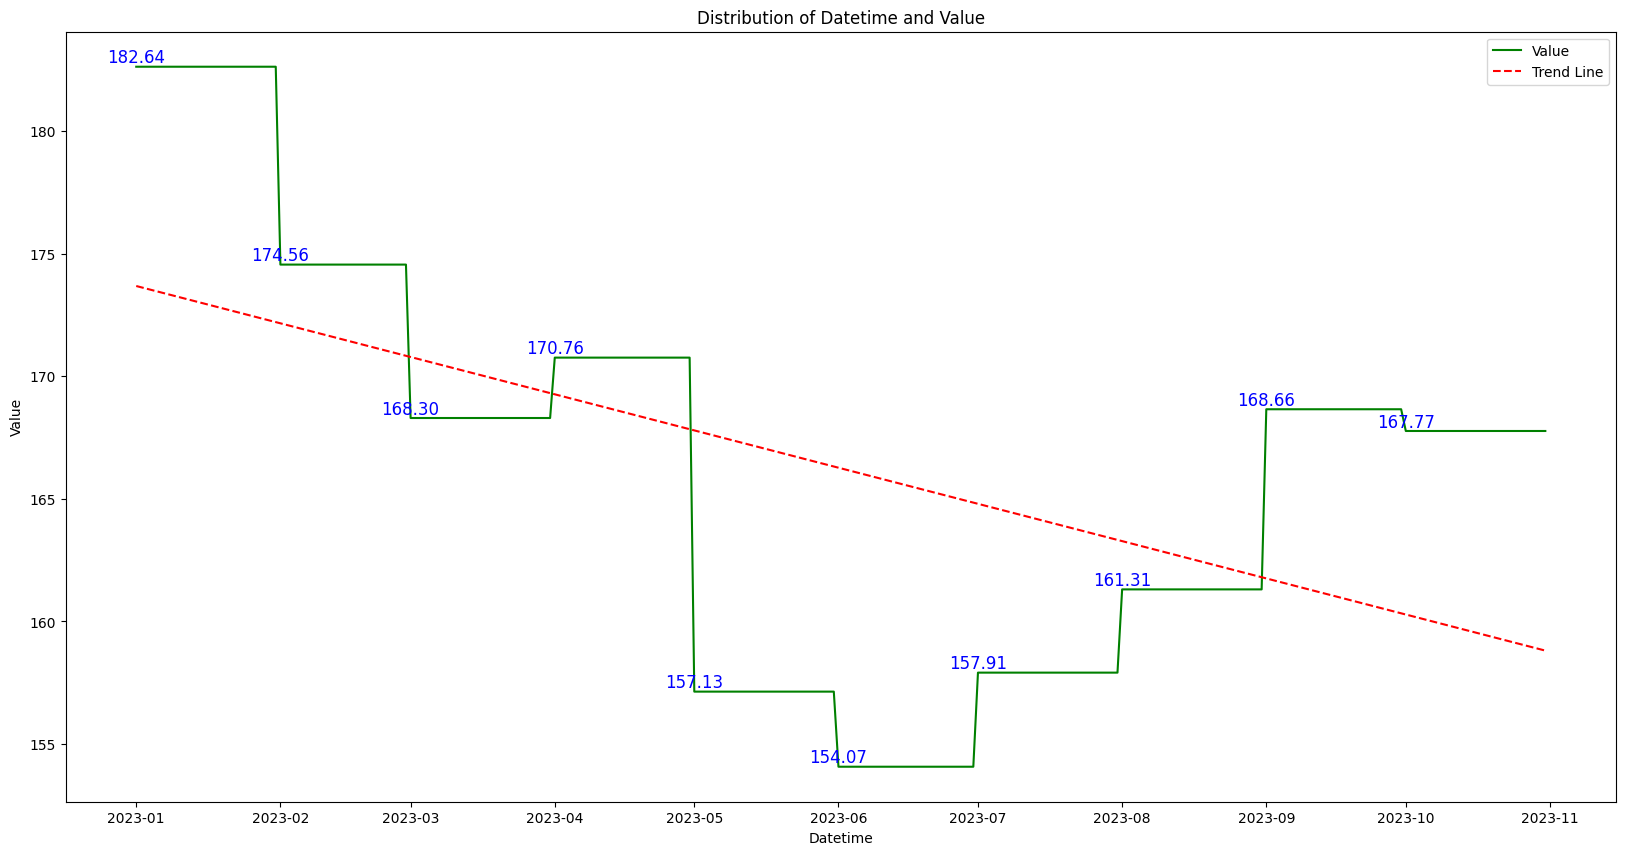

In [14]:
# Convert datetime to numerical values for regression
data['numeric_datetime'] = pd.to_numeric(data['datetime'])

# Fit a linear regression line
coefficients = np.polyfit(data['numeric_datetime'], data['value'], 1)
polynomial = np.poly1d(coefficients)
trend_line = polynomial(data['numeric_datetime'])

plt.figure(figsize=(20, 10))
plt.plot(data['datetime'], data['value'], label='Value', color = 'green')
plt.plot(data['datetime'], trend_line, label='Trend Line', color='red', linestyle='--')
plt.xlabel('Datetime')
plt.ylabel('Value')
plt.title('Distribution of Datetime and Value')

# Filter data to include only the first day of each month
monthly_data = data[data['datetime'].dt.day == 1]

# Adding text annotations on top of the line for the first day of each month
for i, (dt, val) in enumerate(zip(monthly_data['datetime'], monthly_data['value'])):
    plt.text(dt, val, f'{val:.2f}', ha='center', va='bottom', fontsize=12, rotation=0, color='blue')

plt.legend()
plt.show()

data.drop(['numeric_datetime'], axis = 1, inplace=True)

## **temperature**

In [15]:
print(f'The highest temperature is {data.temperature.max()}\nThe lowest temperature is {data.temperature.min()}')

The highest temperature is 30.0
The lowest temperature is -4.2


In [16]:
data['temperature'].value_counts()

temperature
13.5    5
23.0    4
20.2    4
20.4    4
25.6    4
       ..
21.5    1
17.3    1
16.7    1
11.3    1
10.3    1
Name: count, Length: 188, dtype: int64

In [17]:
data['temperature'].nunique()

188

C:\Users\LEGION\AppData\Local\Temp\ipykernel_11480\3597138894.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['temperature'], hist_kws=dict(edgecolor='black', color='green'), kde_kws=dict(color='black'))


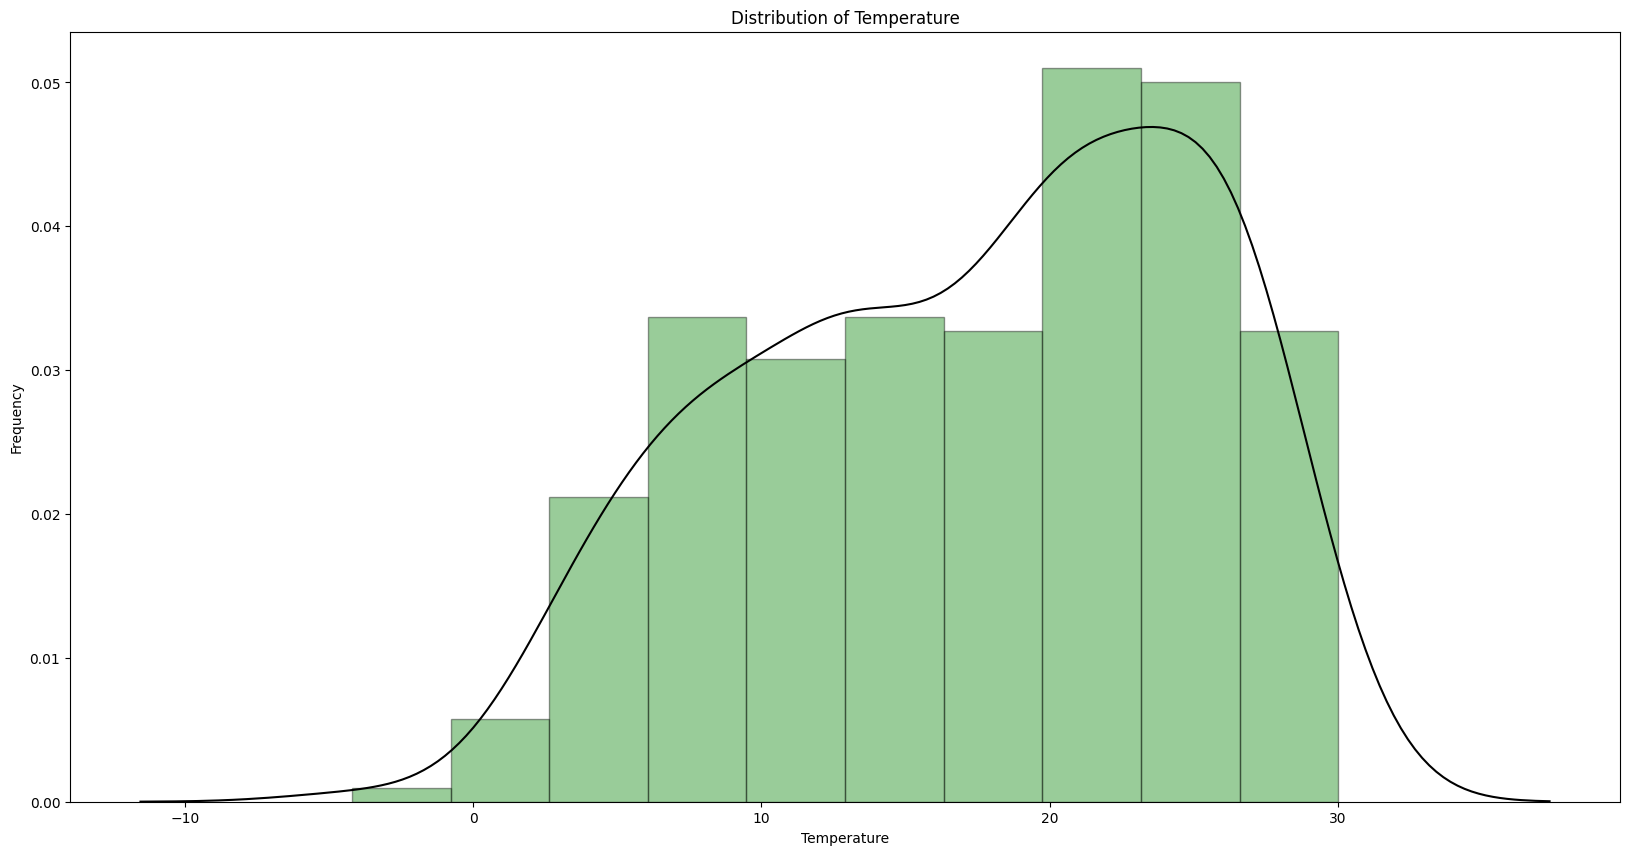

In [18]:
plt.figure(figsize=(20, 10))
sns.distplot(data['temperature'], hist_kws=dict(edgecolor='black', color='green'), kde_kws=dict(color='black'))
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title('Distribution of Temperature')
plt.show()

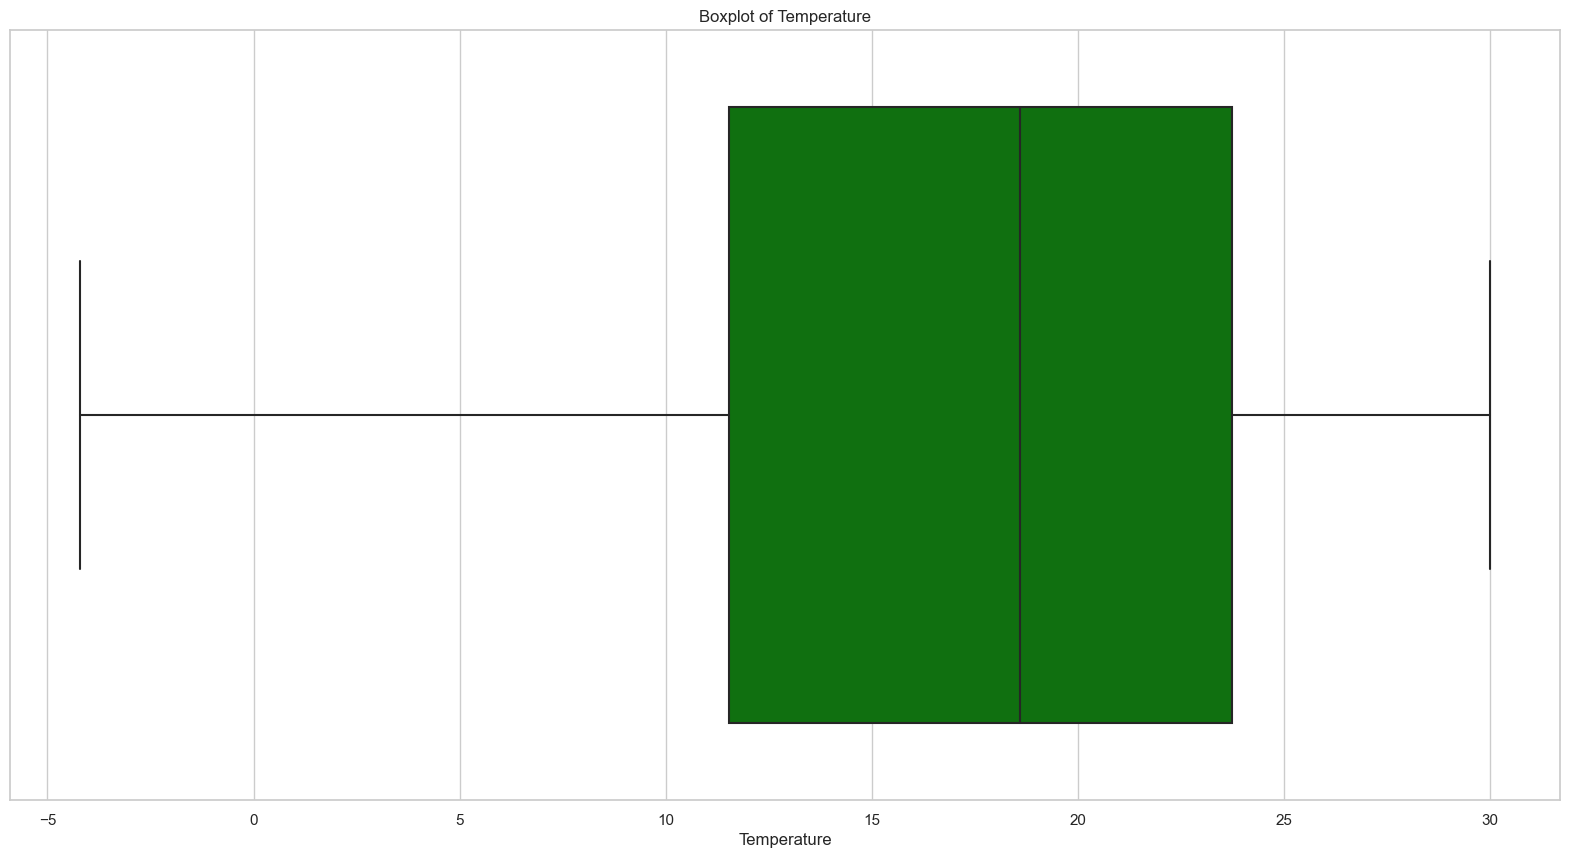

In [19]:
plt.figure(figsize=(20, 10))
sns.set(style="whitegrid")
sns.boxplot(x=data['temperature'], color='green')
plt.xlabel('Temperature')
plt.title('Boxplot of Temperature')
plt.show()

### ***temperature vs value***

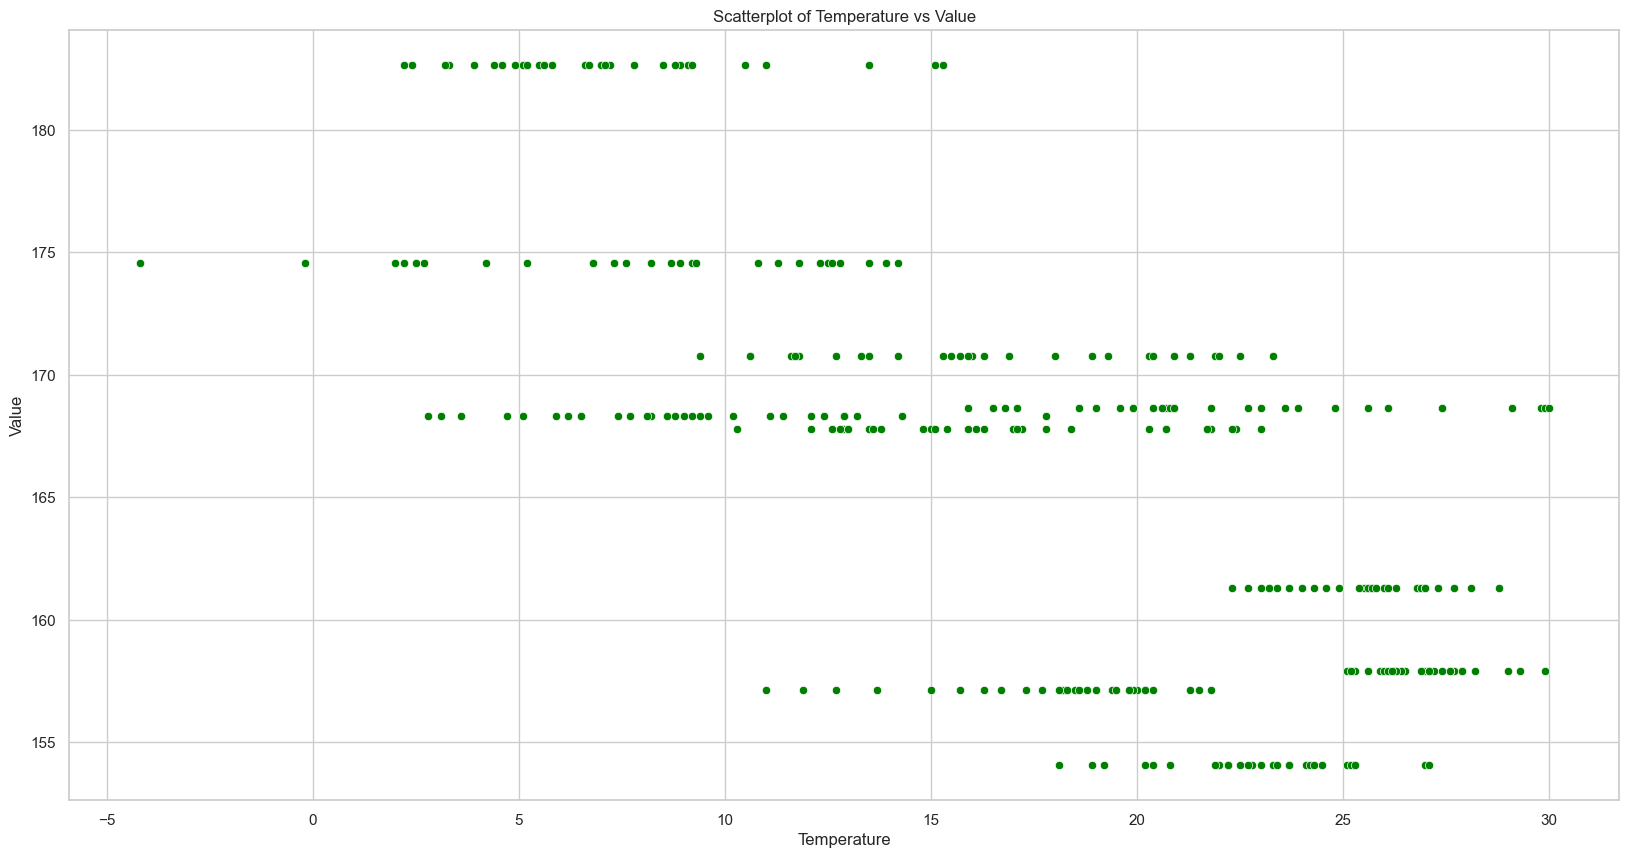

In [20]:
# plot correlation between temperature vs value

plt.figure(figsize=(20, 10))
sns.scatterplot(x=data['temperature'], y=data['value'], color='green')
plt.xlabel('Temperature')
plt.ylabel('Value')
plt.title('Scatterplot of Temperature vs Value')
plt.show()

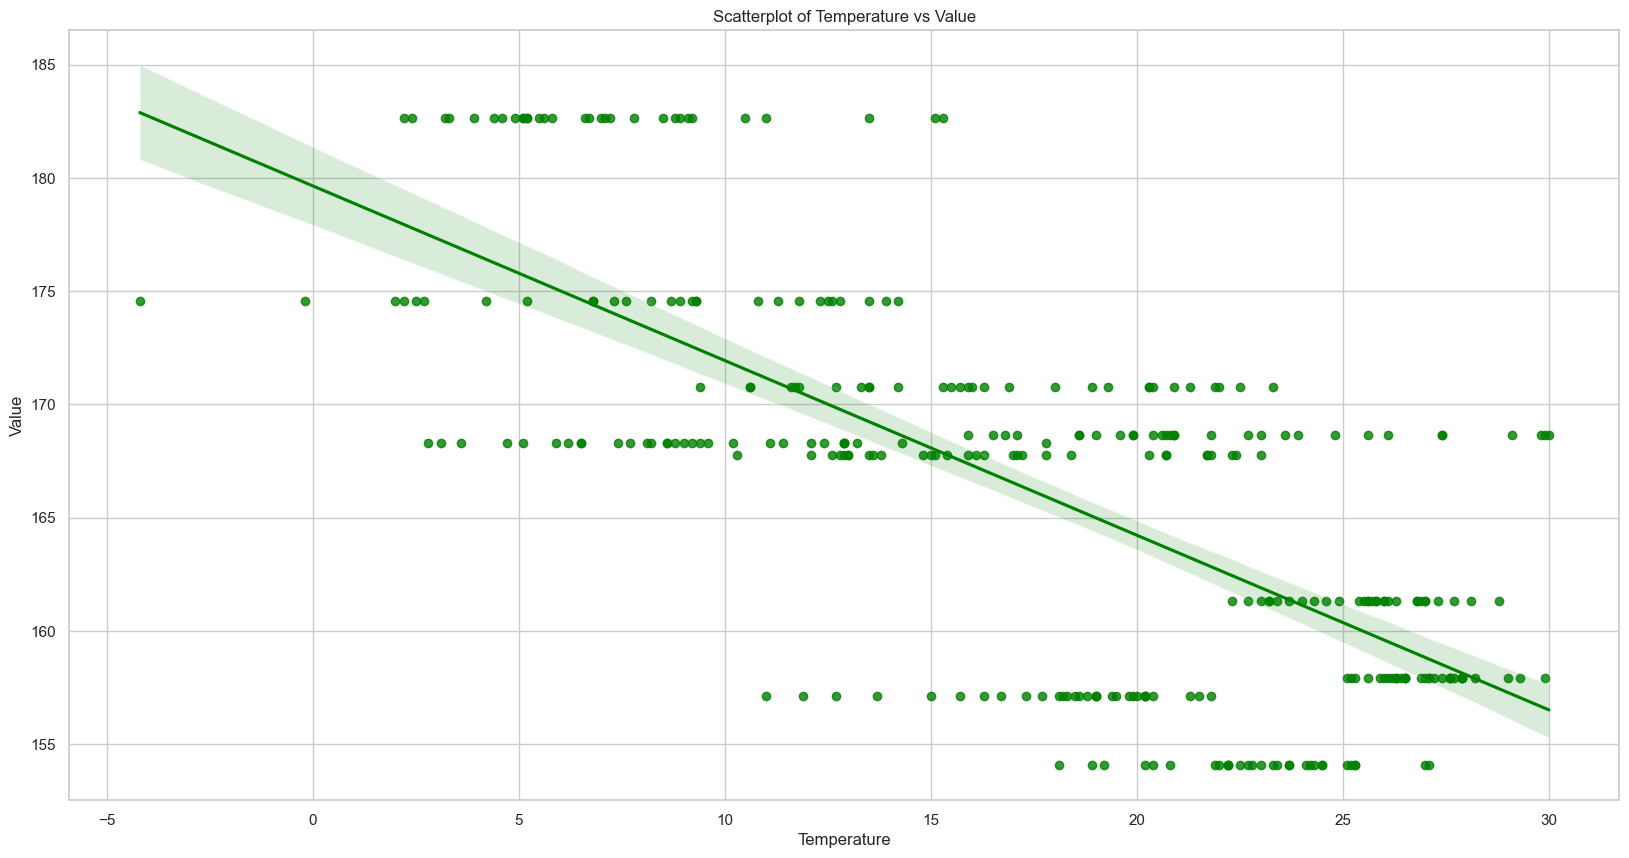

In [21]:
# plot the correlation between temperature and value with sns.regplot

plt.figure(figsize=(20, 10))
sns.regplot(x=data['temperature'], y=data['value'], color='green')
plt.xlabel('Temperature')
plt.ylabel('Value')
plt.title('Scatterplot of Temperature vs Value')
plt.show()

## **dew_point**

In [22]:
print(f'The highest dew point is {data.dew_point.max()}\nThe lowest dew point is {data.dew_point.min()}')

The highest dew point is 23.2
The lowest dew point is -16.6


In [23]:
data['dew_point'].value_counts()

dew_point
20.7    5
11.0    5
15.5    5
0.1     4
16.4    4
       ..
12.2    1
7.3     1
15.2    1
3.5     1
0.4     1
Name: count, Length: 187, dtype: int64

C:\Users\LEGION\AppData\Local\Temp\ipykernel_11480\1350731684.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['dew_point'], hist_kws=dict(edgecolor='black', color='green'), kde_kws=dict(color='black'))


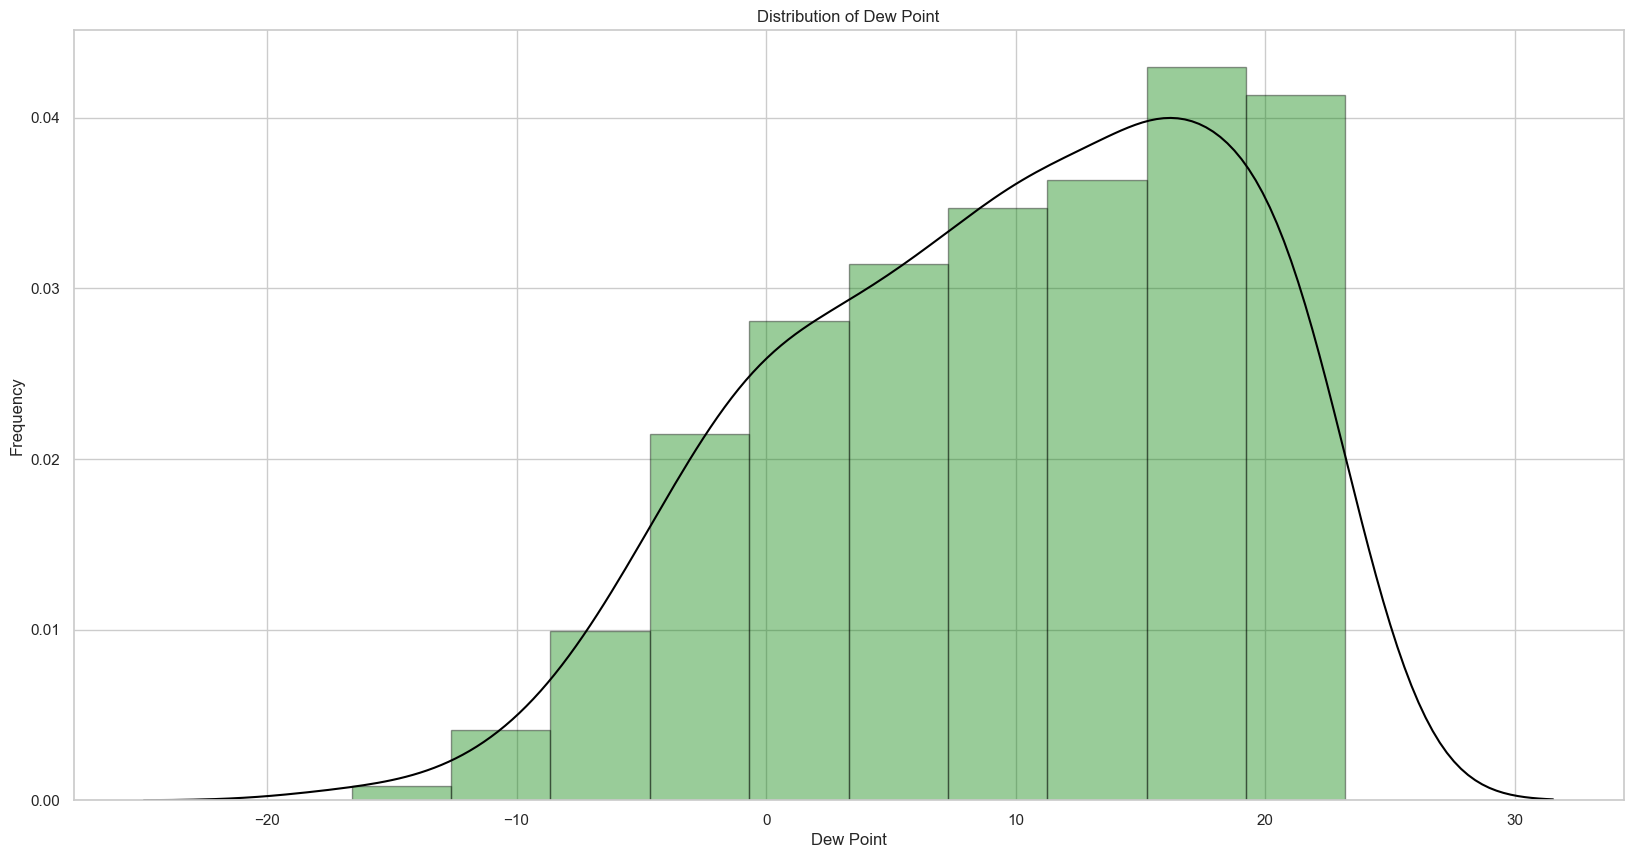

In [24]:
# distribution plot for dew point

plt.figure(figsize=(20, 10))
sns.distplot(data['dew_point'], hist_kws=dict(edgecolor='black', color='green'), kde_kws=dict(color='black'))
plt.xlabel('Dew Point')
plt.ylabel('Frequency')
plt.title('Distribution of Dew Point')
plt.show()

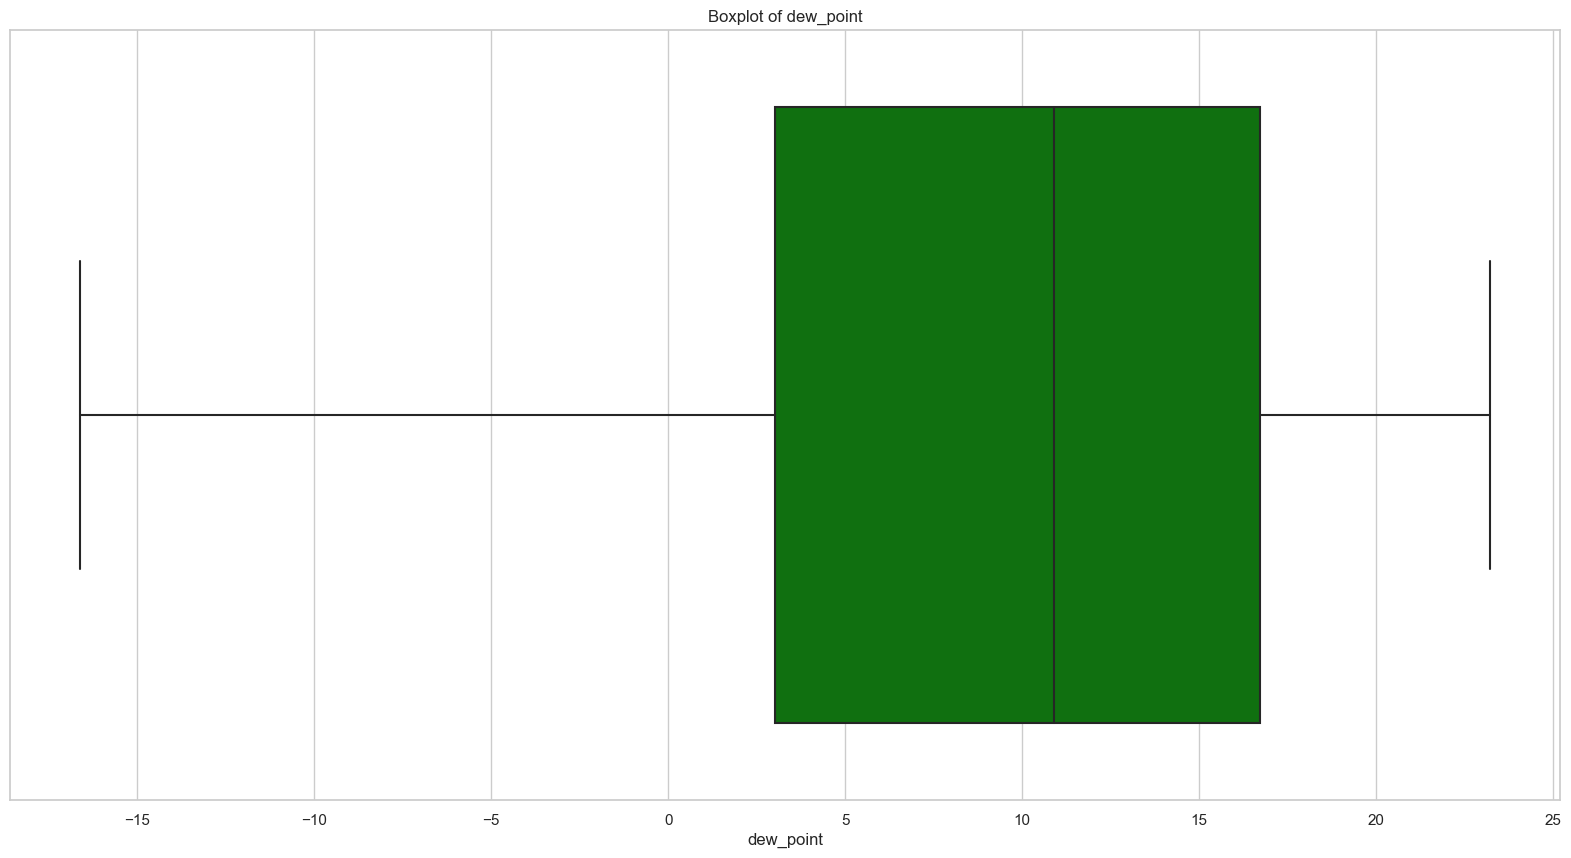

In [25]:
plt.figure(figsize=(20, 10))
sns.set(style="whitegrid")
sns.boxplot(x=data['dew_point'], color='green')
plt.xlabel('dew_point')
plt.title('Boxplot of dew_point')
plt.show()

### ***dew_point vs value***

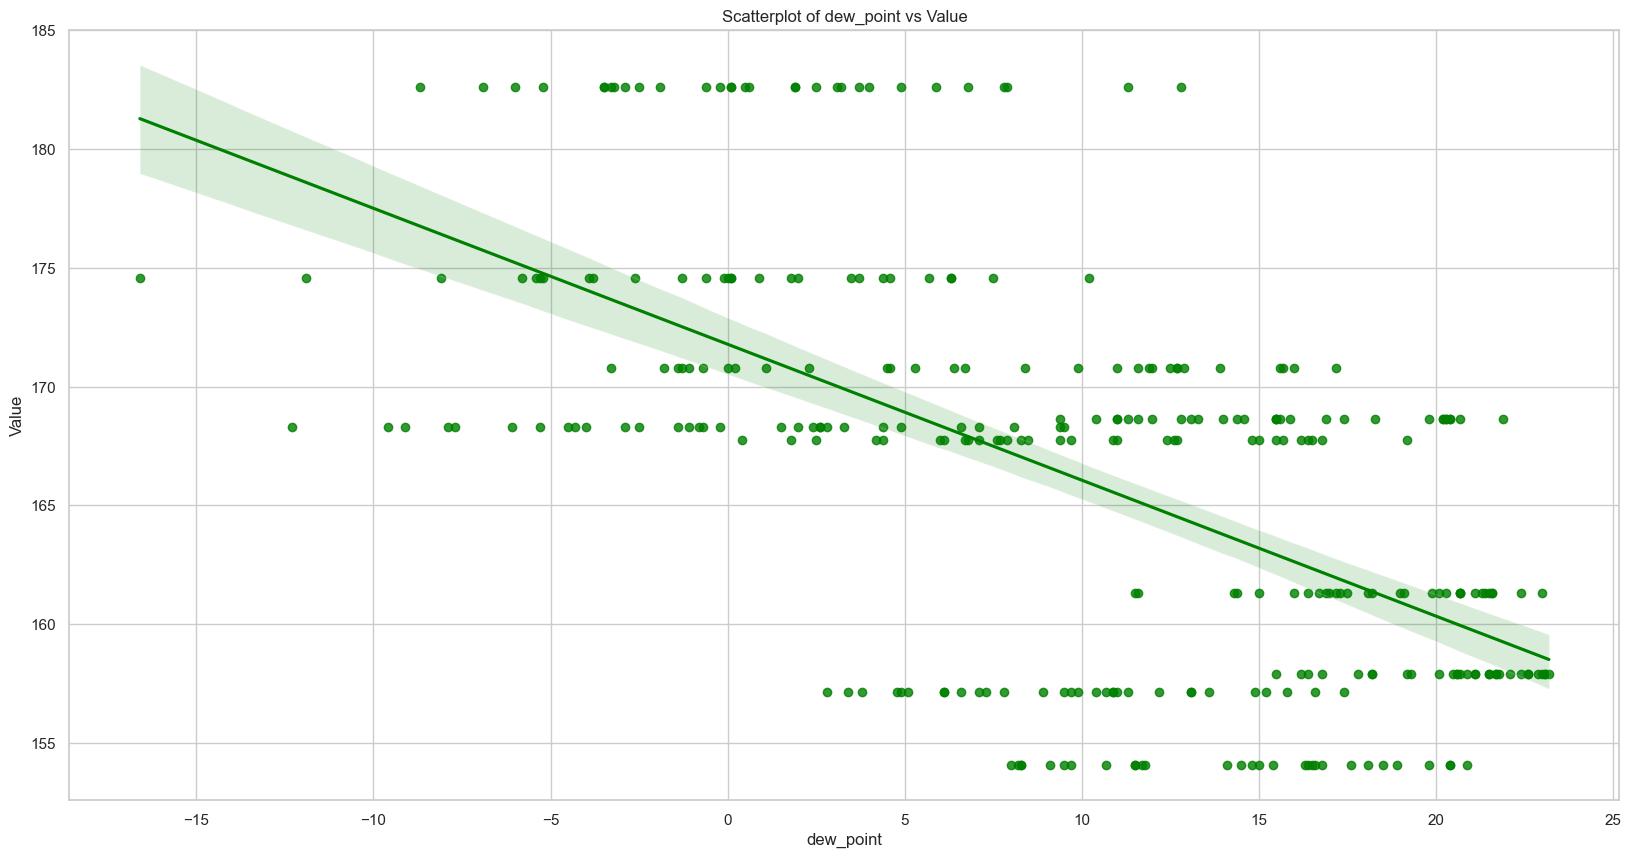

In [26]:
# plot the correlation between dew point and value with sns.regplot

plt.figure(figsize=(20, 10))
sns.regplot(x=data['dew_point'], y=data['value'], color='green')
plt.xlabel('dew_point')
plt.ylabel('Value')
plt.title('Scatterplot of dew_point vs Value')
plt.show()

## **relative_humidity**

In [27]:
print(f'The highest relative_humidity is {data.relative_humidity.max()}\nThe lowest relative_humidity is {data.relative_humidity.min()}')

The highest relative_humidity is 91.4
The lowest relative_humidity is 32.13


In [28]:
data['relative_humidity'].value_counts()

relative_humidity
83.65    2
60.59    2
62.24    2
50.94    2
60.12    2
        ..
44.77    1
47.09    1
41.64    1
42.88    1
50.86    1
Name: count, Length: 297, dtype: int64

C:\Users\LEGION\AppData\Local\Temp\ipykernel_11480\3331830686.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['relative_humidity'], hist_kws=dict(edgecolor='black', color='green'), kde_kws=dict(color='black'))


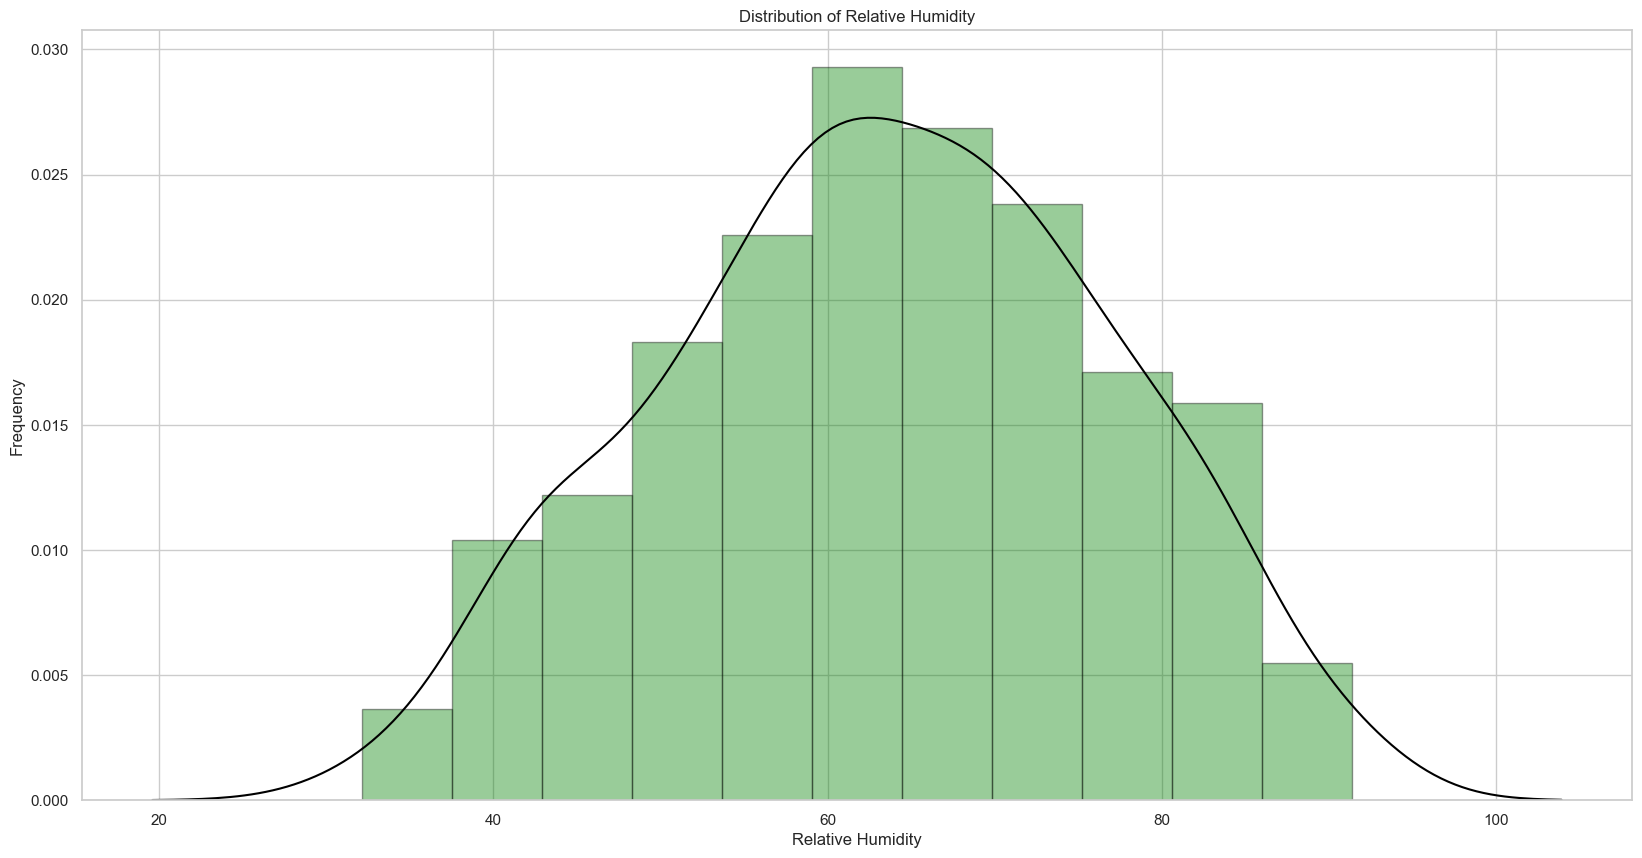

In [29]:
# plot distribution of relative_humidity

plt.figure(figsize=(20, 10))
sns.distplot(data['relative_humidity'], hist_kws=dict(edgecolor='black', color='green'), kde_kws=dict(color='black'))
plt.xlabel('Relative Humidity')
plt.ylabel('Frequency')
plt.title('Distribution of Relative Humidity')
plt.show()

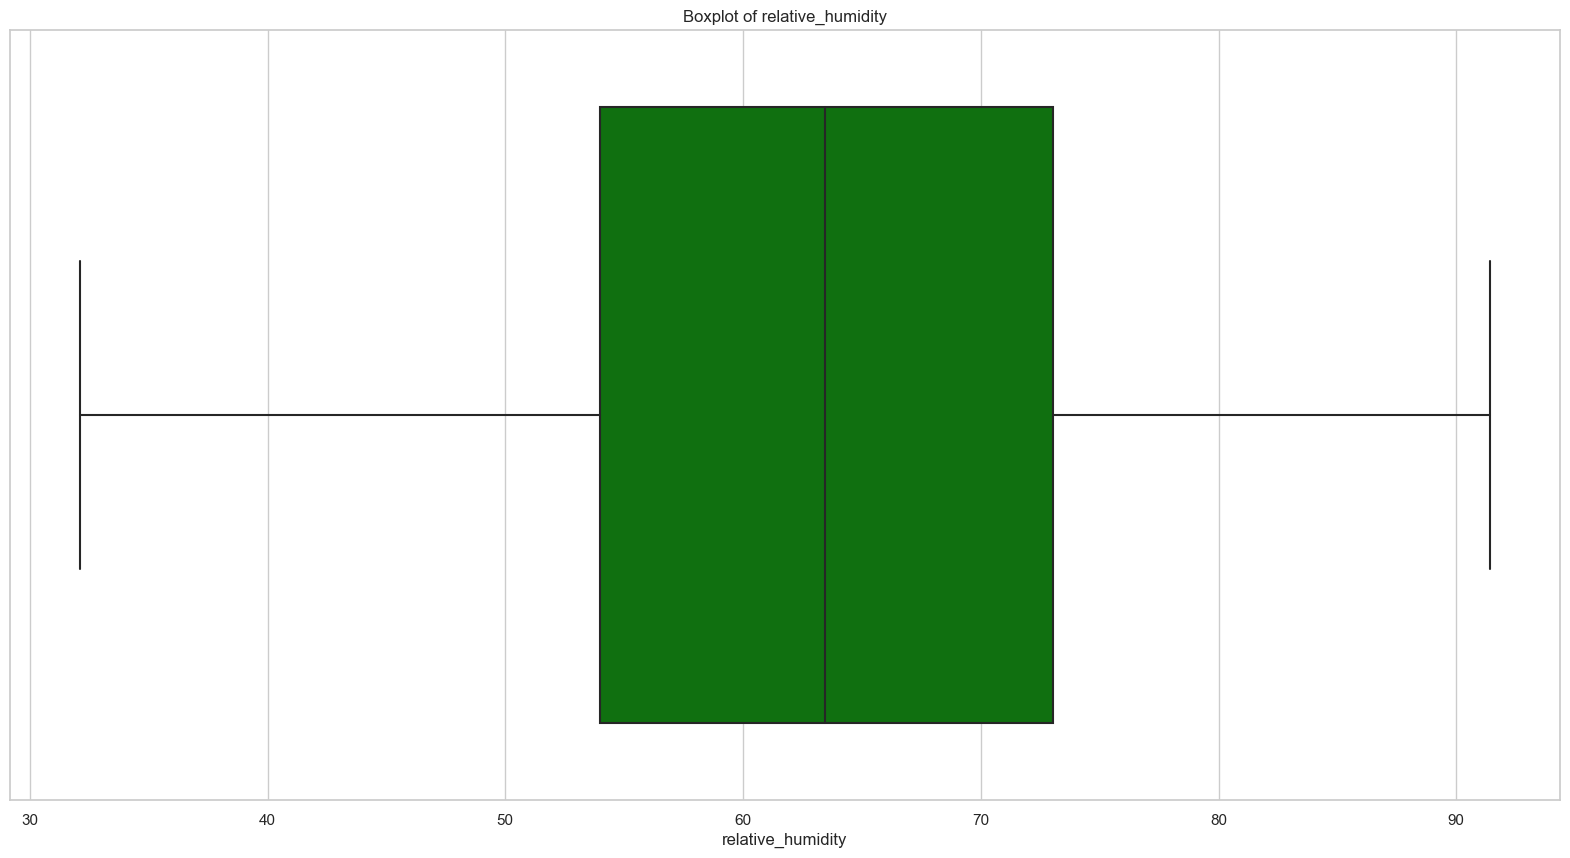

In [30]:
plt.figure(figsize=(20, 10))
sns.set(style="whitegrid")
sns.boxplot(x=data['relative_humidity'], color='green')
plt.xlabel('relative_humidity')
plt.title('Boxplot of relative_humidity')
plt.show()

### ***relative_humidity vs value***

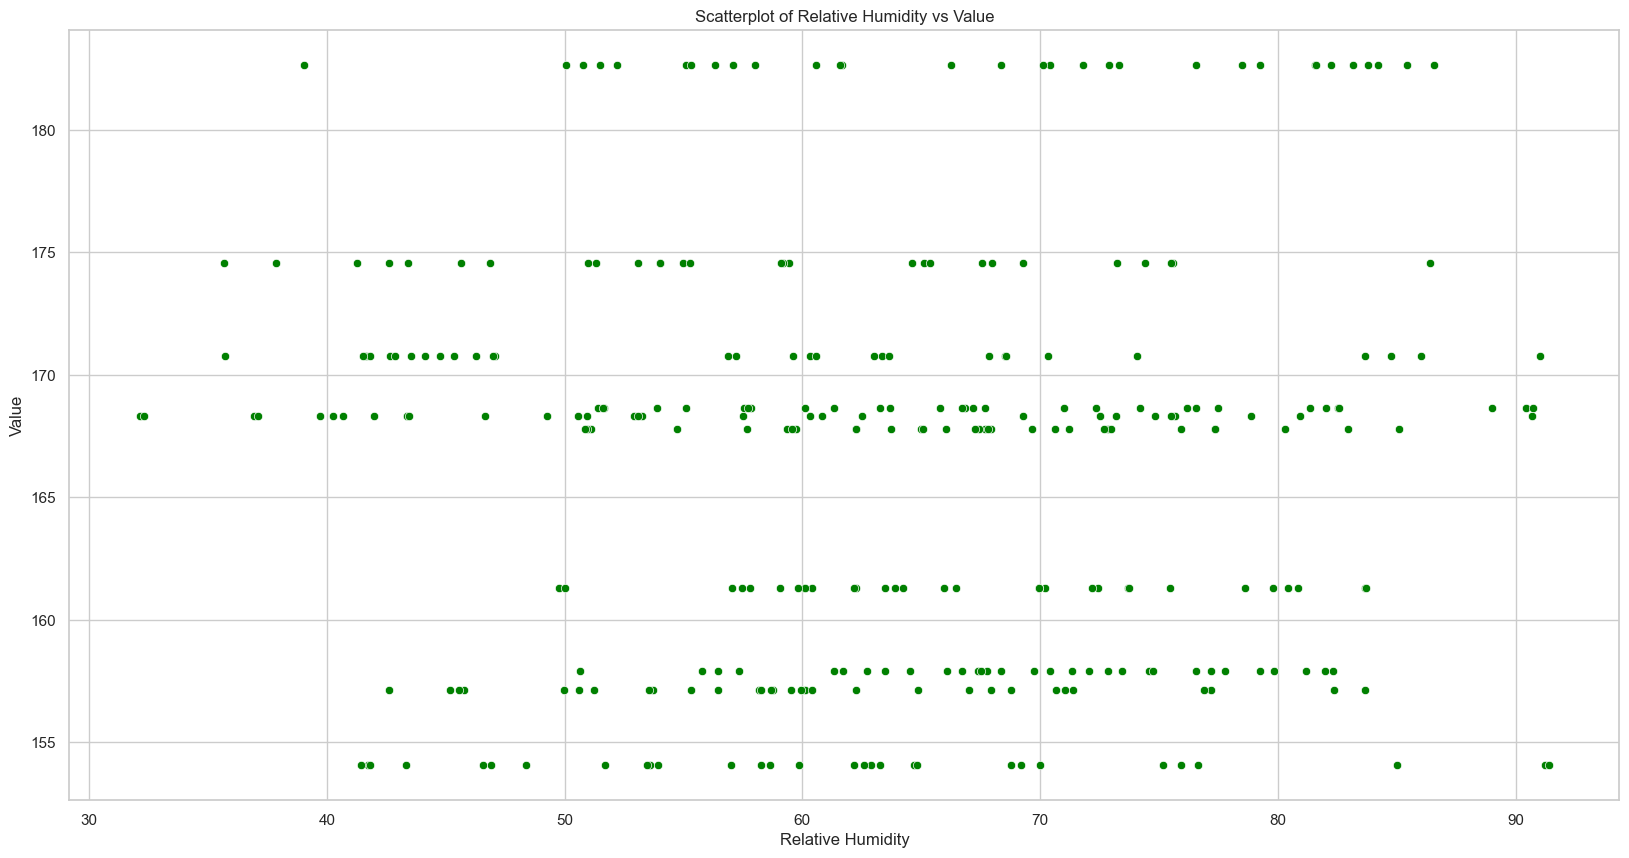

In [31]:
# plot correlation between relative_humidity vs value

plt.figure(figsize=(20, 10))
sns.scatterplot(x=data['relative_humidity'], y=data['value'], color='green')
plt.xlabel('Relative Humidity')
plt.ylabel('Value')
plt.title('Scatterplot of Relative Humidity vs Value')
plt.show()

## **wind_speed**

In [32]:
print(f'The highest wind_speed is {data.wind_speed.max()}\nThe lowest wind_speed is {data.wind_speed.min()}')

The highest wind_speed is 58.1
The lowest wind_speed is 9.1


C:\Users\LEGION\AppData\Local\Temp\ipykernel_11480\1242924065.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['wind_speed'], hist_kws=dict(edgecolor='black', color='green'), kde_kws=dict(color='black'))


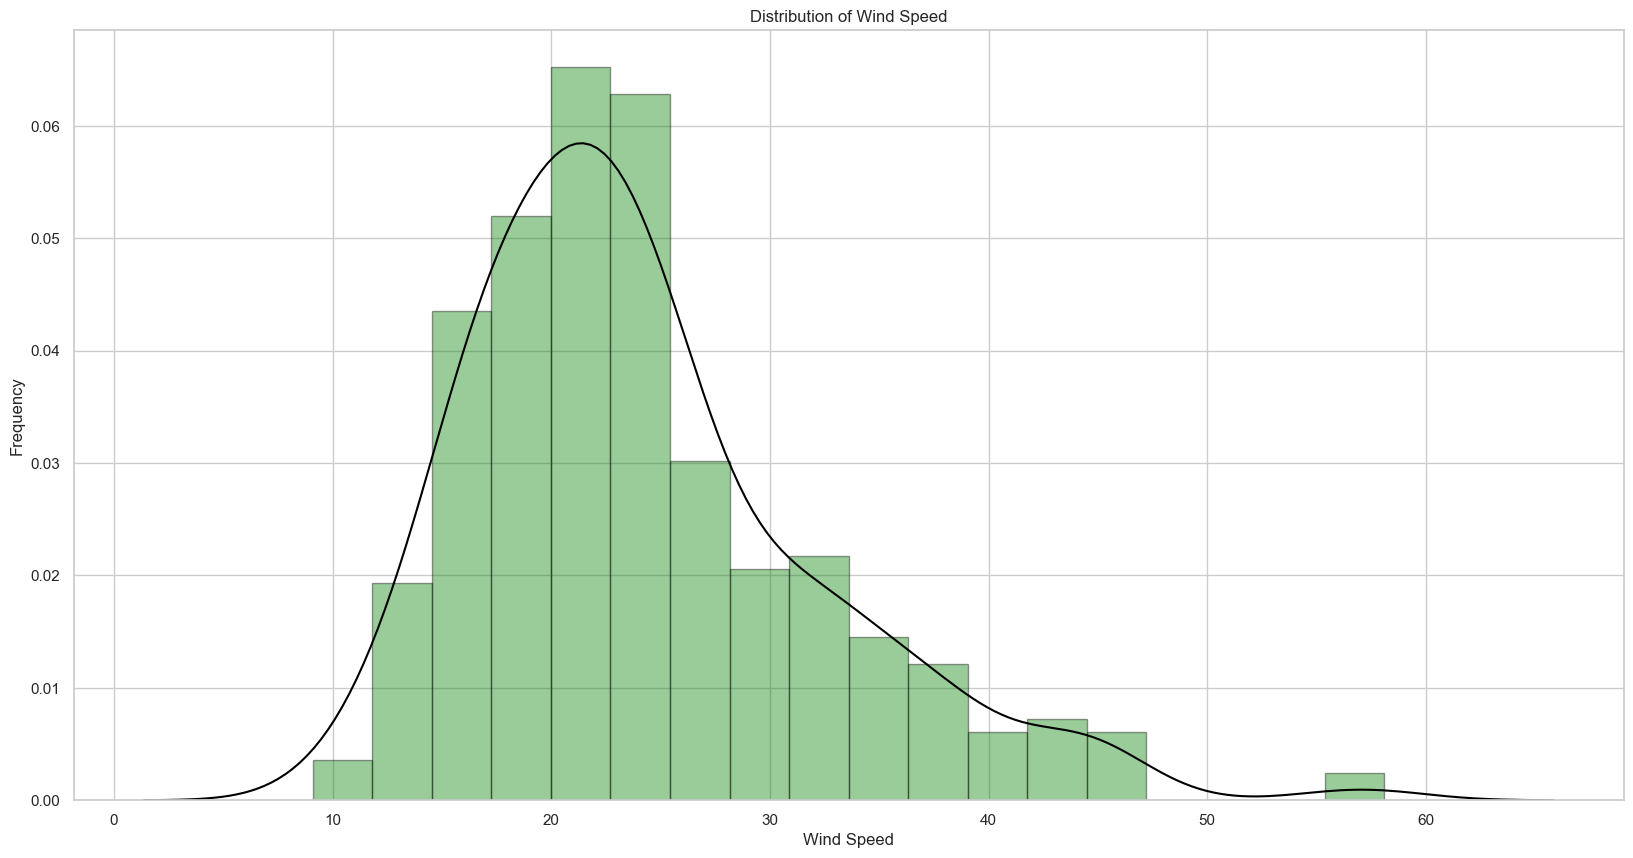

In [33]:
# plot distribution of wind_speed

plt.figure(figsize=(20, 10))
sns.distplot(data['wind_speed'], hist_kws=dict(edgecolor='black', color='green'), kde_kws=dict(color='black'))
plt.xlabel('Wind Speed')
plt.ylabel('Frequency')
plt.title('Distribution of Wind Speed')
plt.show()

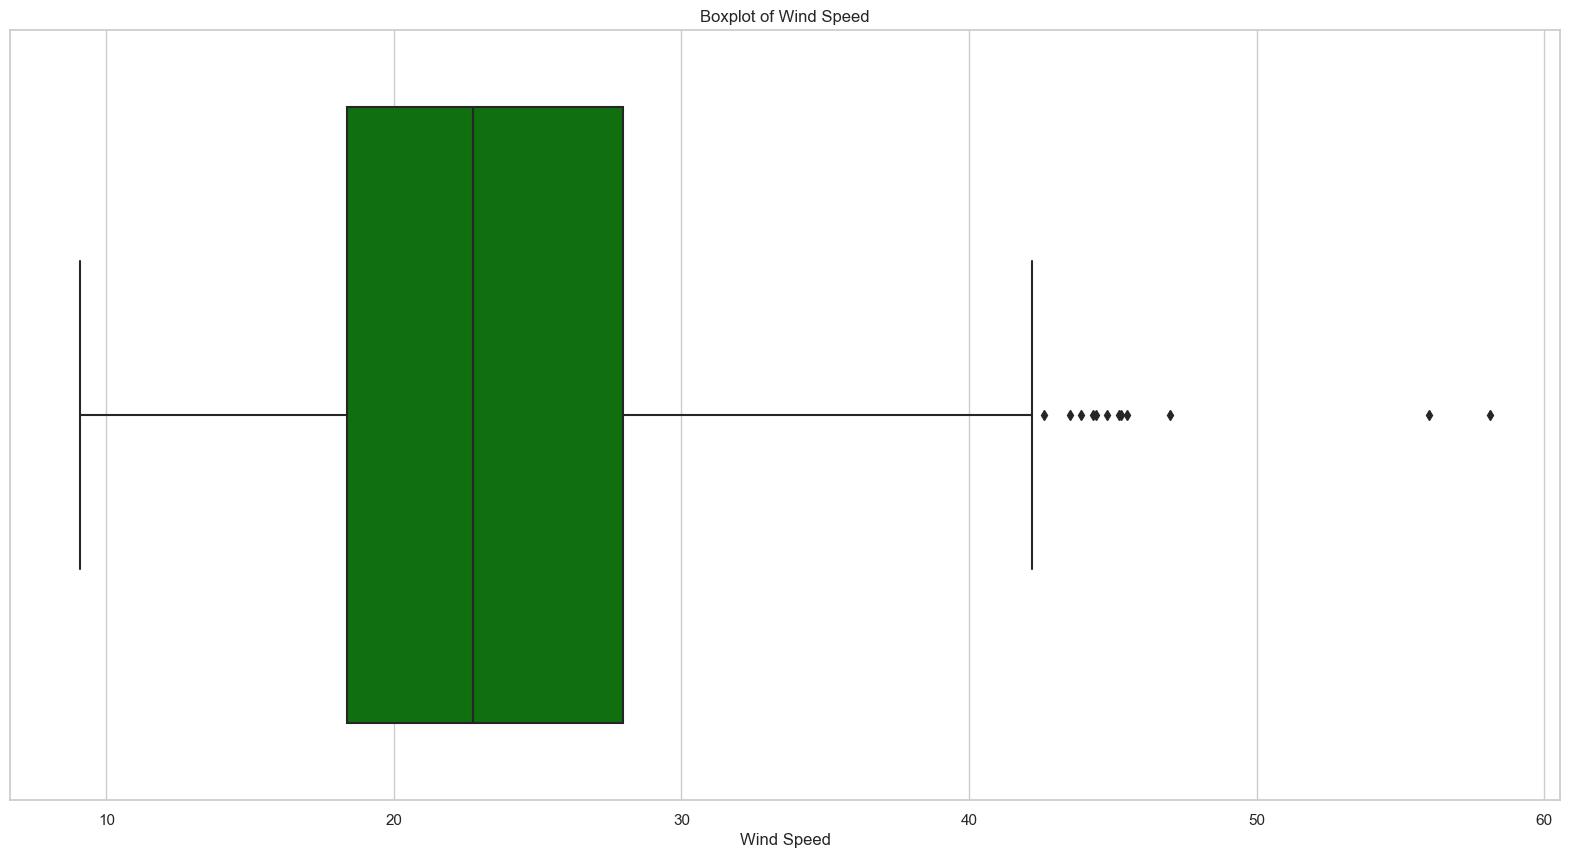

In [34]:
# plot boxplot of wind_speed

plt.figure(figsize=(20, 10))
sns.set(style="whitegrid")
sns.boxplot(x=data['wind_speed'], color='green')
plt.xlabel('Wind Speed')
plt.title('Boxplot of Wind Speed')
plt.show()

In [35]:
# print the upper bound and lower bound based on IQR

Q1 = data['wind_speed'].quantile(0.25)
Q3 = data['wind_speed'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + (1.5 * IQR)
lower_bound = Q1 - (1.5 * IQR)
print(f'The upper bound is {upper_bound}\nThe lower bound is {lower_bound}')

The upper bound is 42.3125
The lower bound is 4.012500000000001


In [36]:
# print outliers in wind_speed based on the upper bound and lower bound

data[(data['wind_speed'] < lower_bound) | (data['wind_speed'] > upper_bound)]

,datetime,temperature,dew_point,relative_humidity,wind_speed,precipitation,cloud_cover,conditions,value
33,2023-02-03,-0.2,-11.9,43.40,45.2,0.00,54.6,Partially cloudy,174.561286
54,2023-02-24,12.6,-2.6,35.67,44.4,0.00,44.2,Partially cloudy,174.561286
62,2023-03-04,9.6,1.5,60.31,43.9,1.87,53.7,"Rain, Partially cloudy",168.300259
65,2023-03-07,8.2,-4.0,46.63,42.6,0.00,46.4,Partially cloudy,168.300259
72,2023-03-14,3.6,-7.9,43.37,45.5,0.00,48.0,Partially cloudy,168.300259
89,2023-03-31,12.1,4.9,62.49,43.5,0.00,70.3,Partially cloudy,168.300259
90,2023-04-01,18.0,11.9,70.35,58.1,6.49,86.0,"Rain, Overcast",170.764655
91,2023-04-02,10.6,-1.8,42.65,45.3,0.00,40.3,Partially cloudy,170.764655
95,2023-04-06,23.3,15.6,63.03,44.8,0.82,85.5,"Rain, Overcast",170.764655
209,2023-07-29,27.6,21.8,72.06,47.0,12.09,73.8,"Rain, Partially cloudy",157.908976


### ***wind_speed vs value***

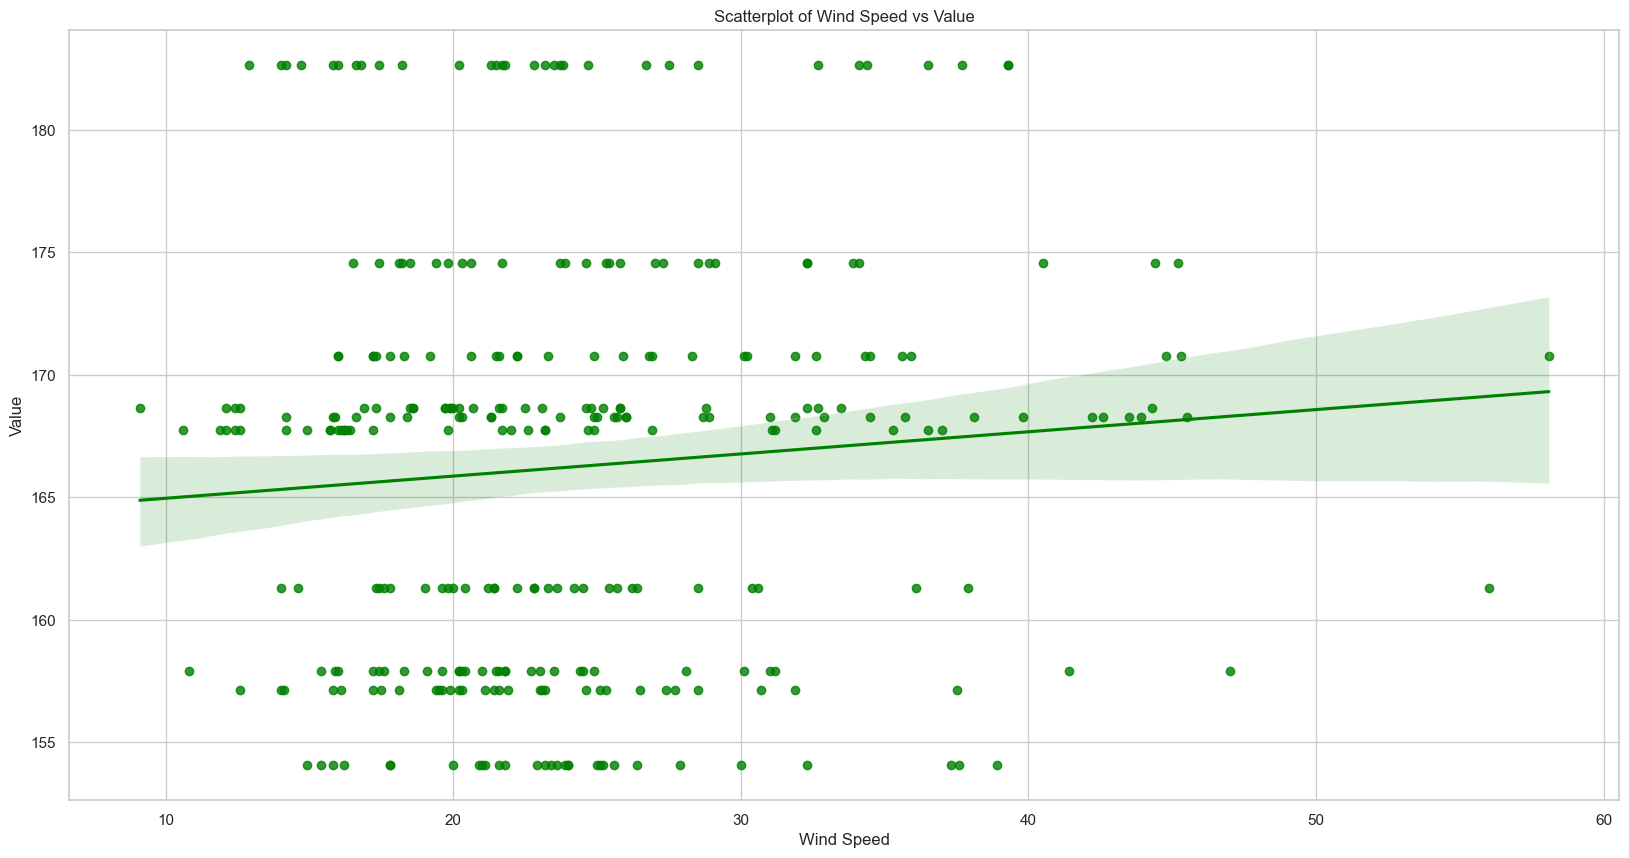

In [37]:
# plot the correlation between wind_speed and value with sns.regplot

plt.figure(figsize=(20, 10))
sns.regplot(x=data['wind_speed'], y=data['value'], color='green')
plt.xlabel('Wind Speed')
plt.ylabel('Value')
plt.title('Scatterplot of Wind Speed vs Value')
plt.show()

## **precipitation**

In [38]:
print(f'the highest precpitation is {data.precipitation.max()}\nThe lowest precpitation is {data.precipitation.min()}')

the highest precpitation is 37.31
The lowest precpitation is 0.0


In [39]:
data['precipitation'].value_counts()

precipitation
0.00    183
0.02      8
0.27      5
1.09      4
0.29      3
       ... 
9.05      1
0.82      1
6.49      1
0.51      1
0.99      1
Name: count, Length: 97, dtype: int64

C:\Users\LEGION\AppData\Local\Temp\ipykernel_11480\2250749199.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['precipitation'], hist_kws=dict(edgecolor='black', color='green'), kde_kws=dict(color='black'))


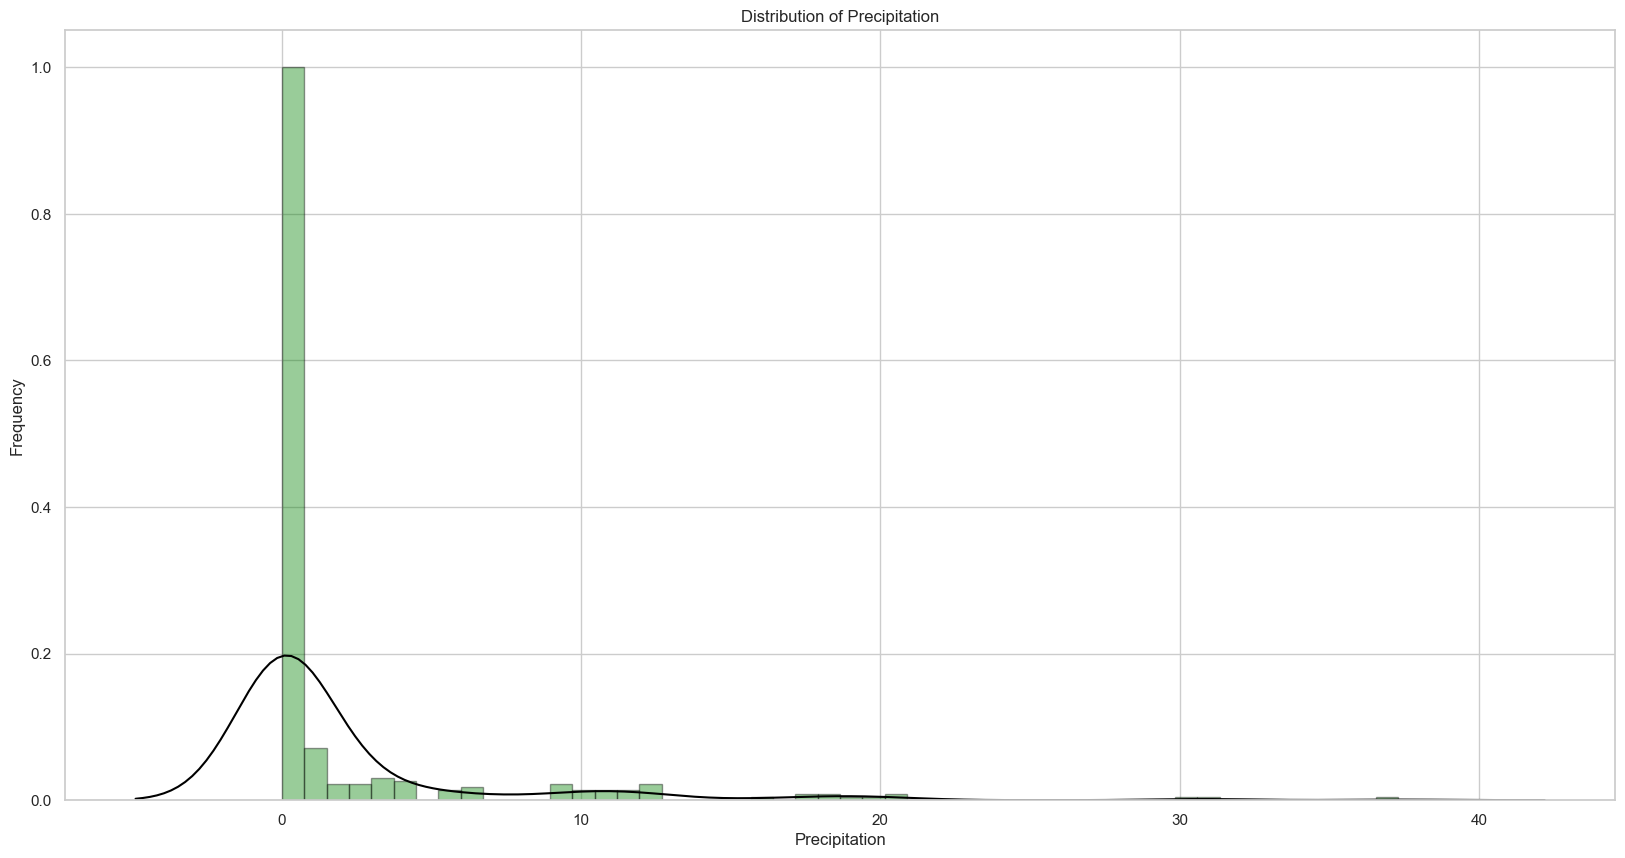

In [40]:
# plot the distribution of precipitation

plt.figure(figsize=(20, 10))
sns.distplot(data['precipitation'], hist_kws=dict(edgecolor='black', color='green'), kde_kws=dict(color='black'))
plt.xlabel('Precipitation')
plt.ylabel('Frequency')
plt.title('Distribution of Precipitation')
plt.show()

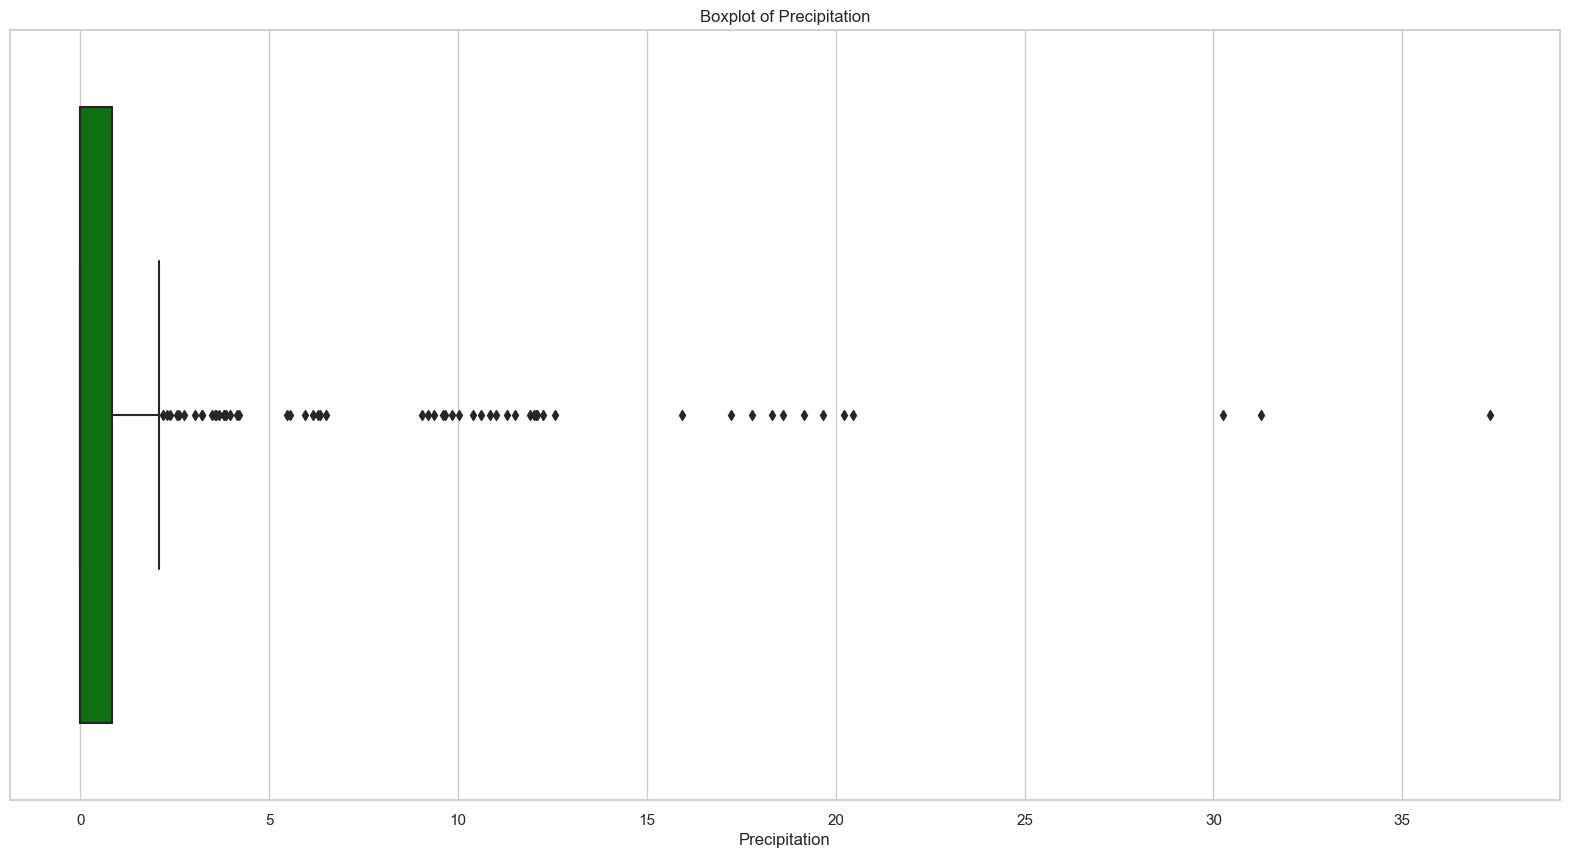

In [41]:
# check the outliers in precipitation

plt.figure(figsize=(20, 10))
sns.set(style="whitegrid")
sns.boxplot(x=data['precipitation'], color='green')
plt.xlabel('Precipitation')
plt.title('Boxplot of Precipitation')
plt.show()

In [42]:
# print the upper bound and lower bound based on IQR

Q1 = data['precipitation'].quantile(0.25)
Q3 = data['precipitation'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + (1.5 * IQR)
lower_bound = Q1 - (1.5 * IQR)
print(f'The upper bound is {upper_bound}\nThe lower bound is {lower_bound}')

# print outliers in precipitation based on the upper bound and lower bound

data[(data['precipitation'] < lower_bound) | (data['precipitation'] > upper_bound)]

The upper bound is 2.09375
The lower bound is -1.2562499999999999


,datetime,temperature,dew_point,relative_humidity,wind_speed,precipitation,cloud_cover,conditions,value
11,2023-01-12,8.5,5.9,84.19,16.8,3.22,95.3,"Rain, Overcast",182.636277
12,2023-01-13,9.1,3.2,68.34,36.5,6.33,83.5,"Rain, Overcast",182.636277
21,2023-01-22,3.2,0.6,83.14,21.5,5.94,89.3,"Rain, Overcast",182.636277
22,2023-01-23,5.6,0.5,71.82,39.3,2.19,96.2,"Rain, Overcast",182.636277
24,2023-01-25,4.9,1.9,81.60,18.2,12.06,95.8,"Rain, Overcast",182.636277
30,2023-01-31,5.2,3.1,86.57,23.2,4.20,85.5,"Rain, Overcast",182.636277
42,2023-02-12,4.2,0.1,75.57,29.1,20.45,91.3,"Rain, Overcast",174.561286
46,2023-02-16,12.5,10.2,86.41,18.1,3.48,90.3,"Rain, Overcast",174.561286
47,2023-02-17,10.8,6.3,75.50,40.5,17.22,88.9,"Rain, Overcast",174.561286
57,2023-02-27,7.6,0.9,64.63,20.6,4.14,80.9,"Rain, Overcast",174.561286


### ***precipitation vs value***

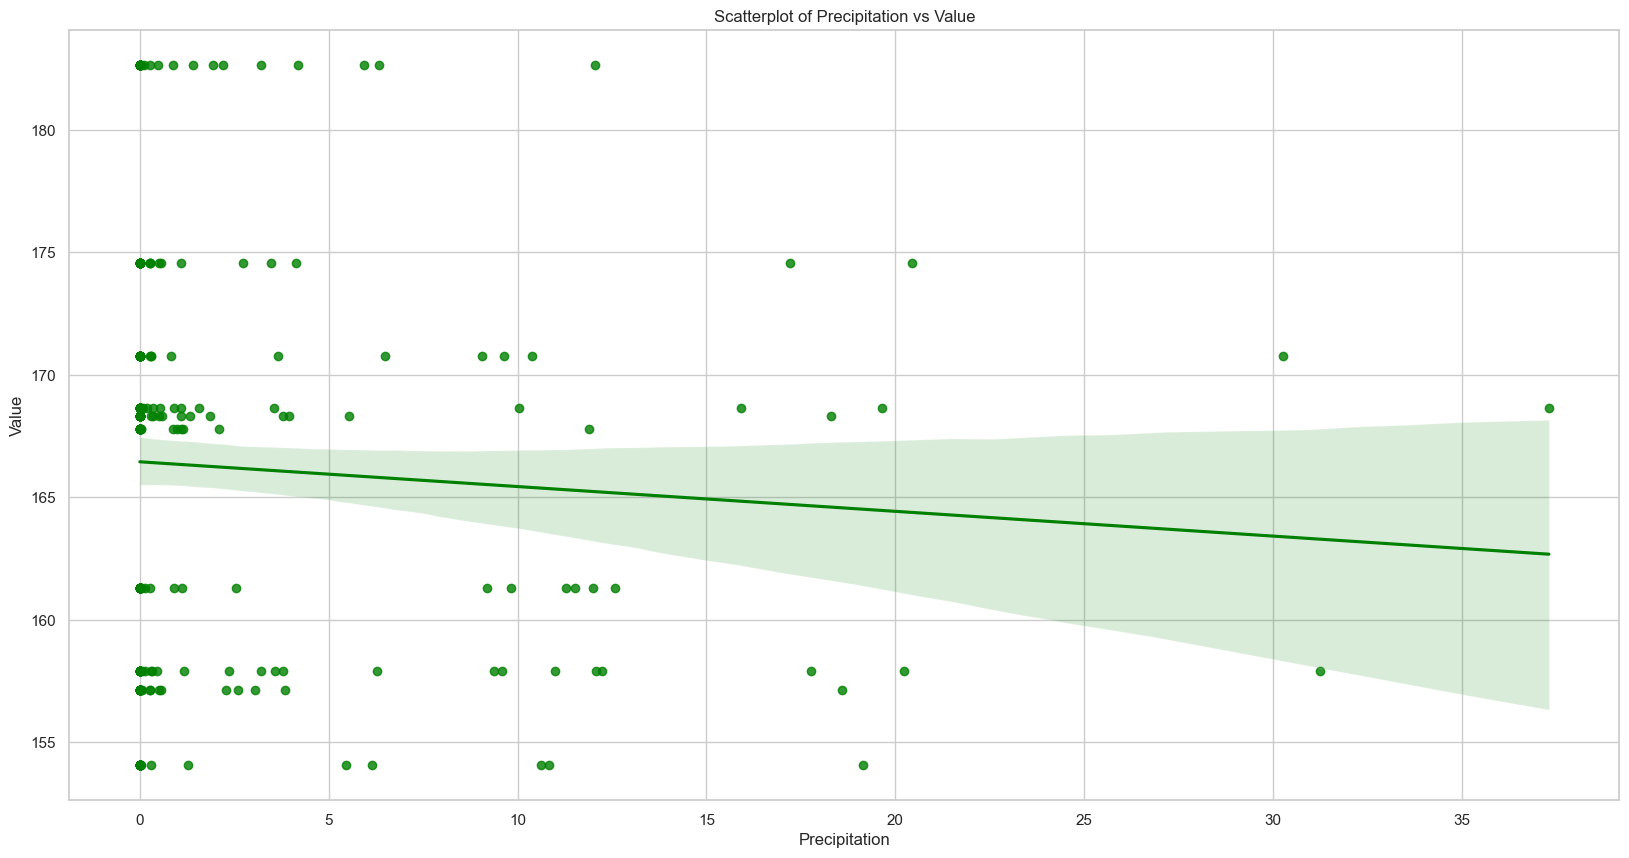

In [43]:
# plot the correlation between precipitation and value

plt.figure(figsize=(20, 10))
sns.regplot(x=data['precipitation'], y=data['value'], color='green')
plt.xlabel('Precipitation')
plt.ylabel('Value')
plt.title('Scatterplot of Precipitation vs Value')
plt.show()

## **cloud_cover**

In [44]:
print(f'The highest cloud_cover is {data.cloud_cover.max()}\nThe lowest cloud_cover is {data.cloud_cover.min()}')

The highest cloud_cover is 100.0
The lowest cloud_cover is 1.0


In [45]:
data['cloud_cover'].value_counts()

cloud_cover
77.5    4
85.4    3
85.1    3
75.8    3
64.6    3
       ..
52.5    1
34.3    1
77.4    1
59.0    1
79.8    1
Name: count, Length: 248, dtype: int64

C:\Users\LEGION\AppData\Local\Temp\ipykernel_11480\1102101869.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['cloud_cover'], hist_kws=dict(edgecolor='black', color='green'), kde_kws=dict(color='black'))


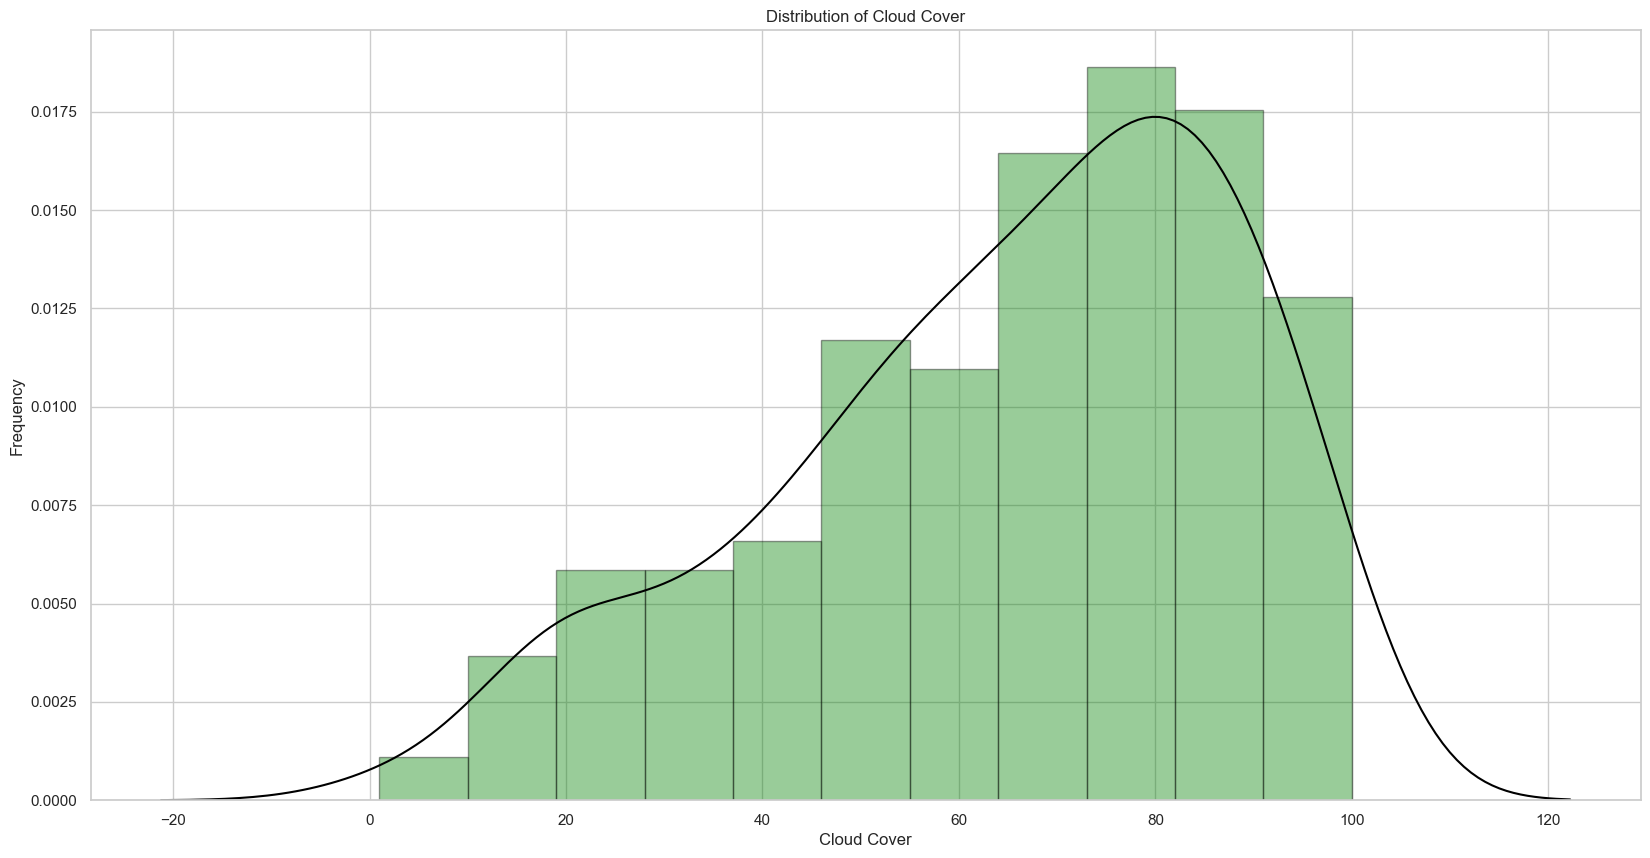

In [46]:
# the distribution of cloud_cover

plt.figure(figsize=(20, 10))
sns.distplot(data['cloud_cover'], hist_kws=dict(edgecolor='black', color='green'), kde_kws=dict(color='black'))
plt.xlabel('Cloud Cover')
plt.ylabel('Frequency')
plt.title('Distribution of Cloud Cover')
plt.show()

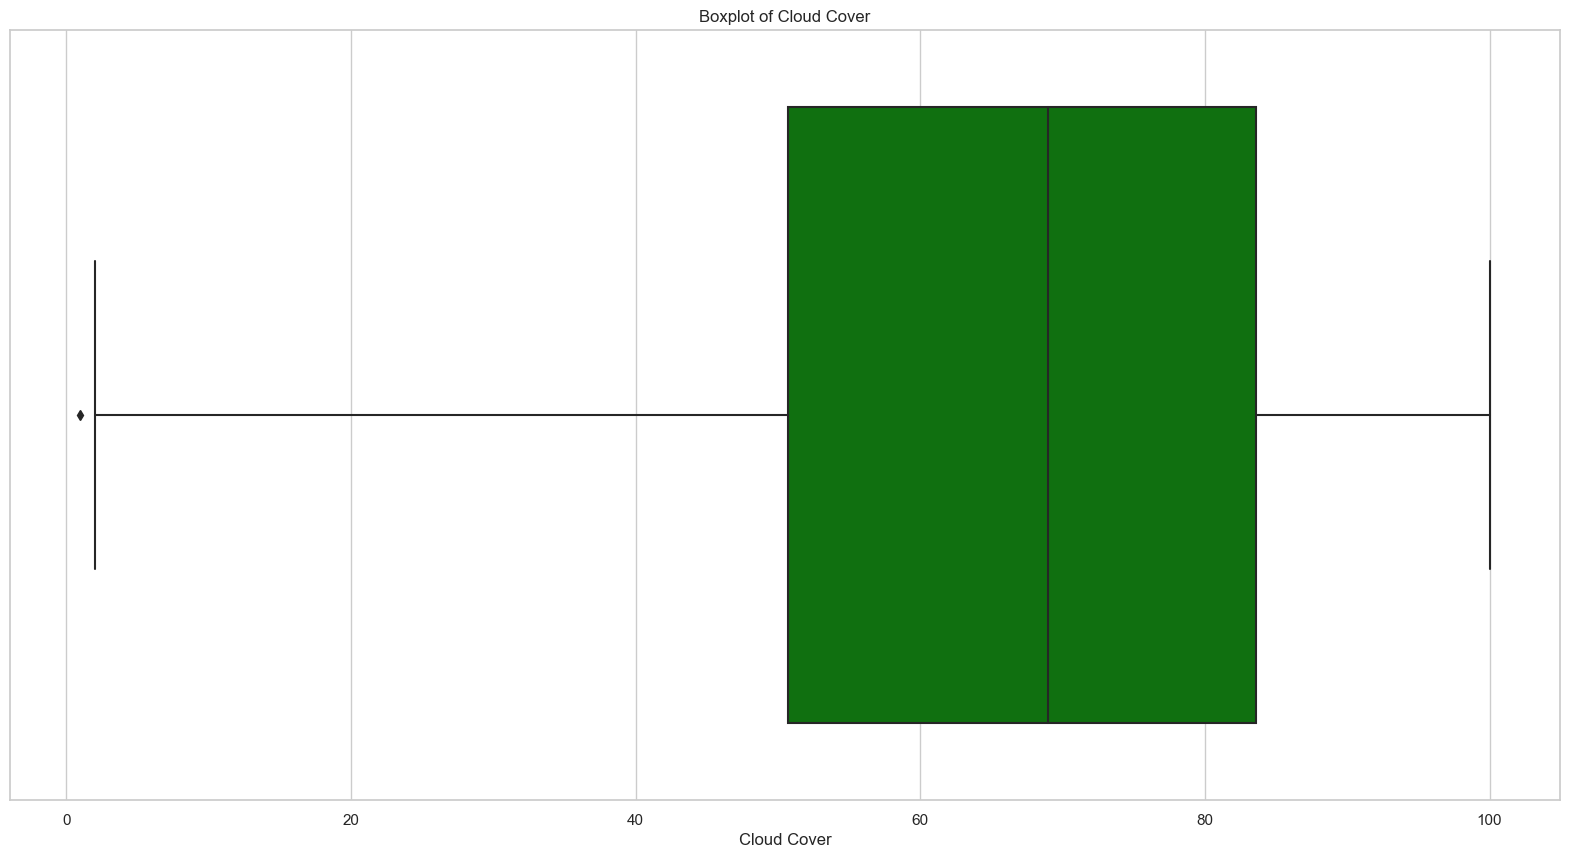

In [47]:
# check the outliers in cloud_cover

plt.figure(figsize=(20, 10))
sns.set(style="whitegrid")
sns.boxplot(x=data['cloud_cover'], color='green')
plt.xlabel('Cloud Cover')
plt.title('Boxplot of Cloud Cover')
plt.show()

In [48]:
# print the upper bound and lower bound based on IQR

Q1 = data['cloud_cover'].quantile(0.25)
Q3 = data['cloud_cover'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + (1.5 * IQR)
lower_bound = Q1 - (1.5 * IQR)
print(f'The upper bound is {upper_bound}\nThe lower bound is {lower_bound}')

# print outliers in cloud_cover based on the upper bound and lower bound

data[(data['cloud_cover'] < lower_bound) | (data['cloud_cover'] > upper_bound)]

The upper bound is 133.0125
The lower bound is 1.312500000000007


,datetime,temperature,dew_point,relative_humidity,wind_speed,precipitation,cloud_cover,conditions,value
295,2023-10-23,12.1,1.8,50.94,22.6,0.0,1.0,Clear,167.770644


### ***cloud_cover vs value***

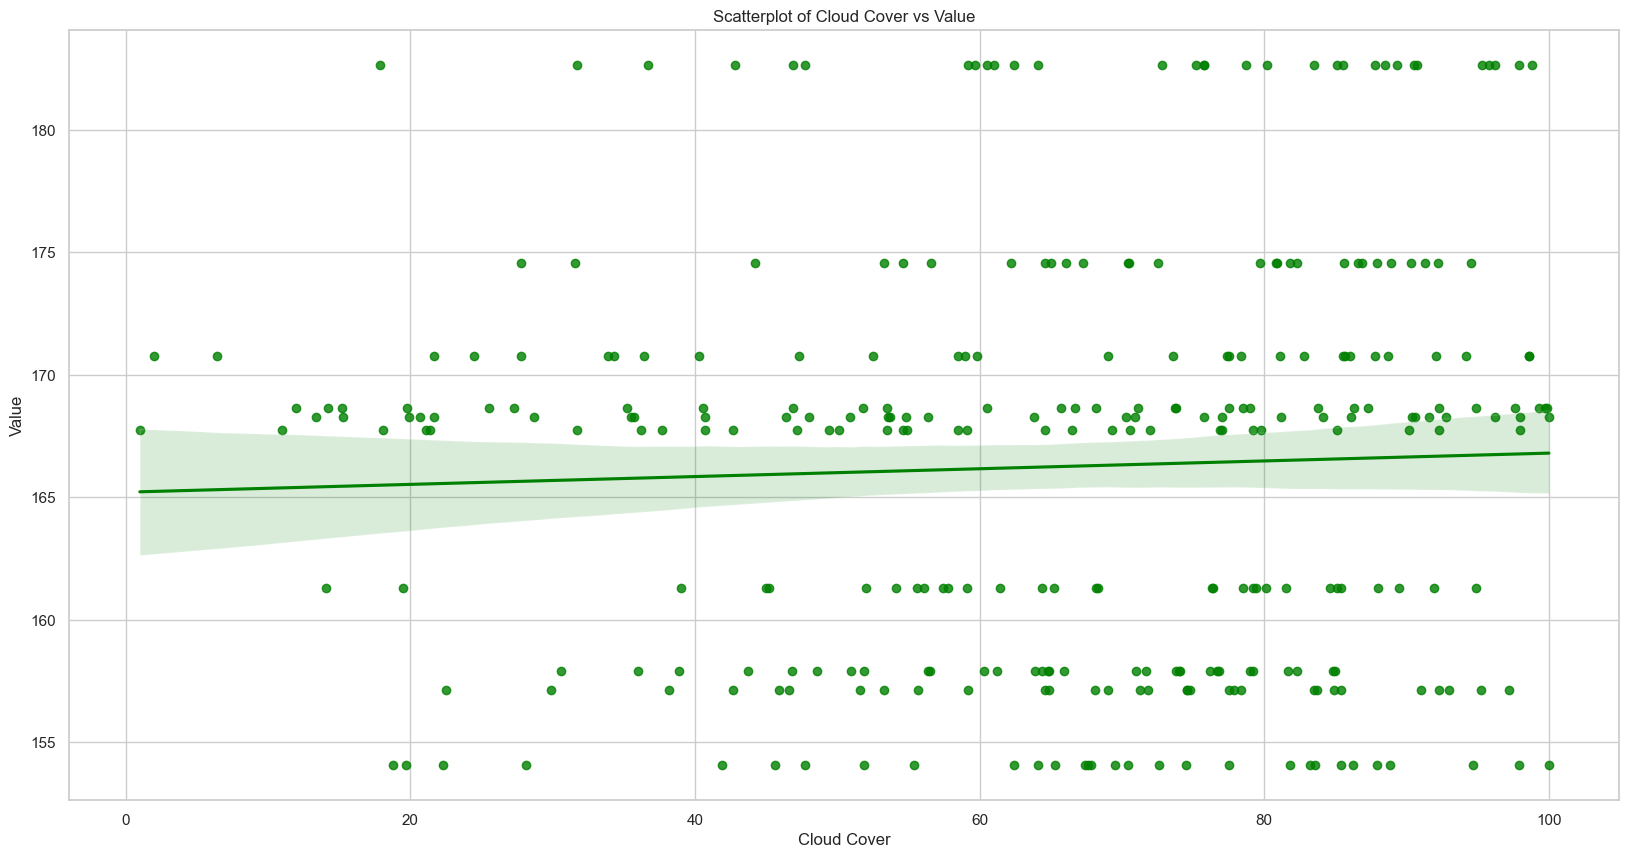

In [49]:
# plot the correlation between cloud_cover and value

plt.figure(figsize=(20, 10))
sns.regplot(x=data['cloud_cover'], y=data['value'], color='green')
plt.xlabel('Cloud Cover')
plt.ylabel('Value')
plt.title('Scatterplot of Cloud Cover vs Value')
plt.show()

## **conditions**

In [50]:
data['conditions'].value_counts()

conditions
Partially cloudy          119
Rain, Overcast             85
Overcast                   39
Rain, Partially cloudy     36
Clear                      25
Name: count, dtype: int64

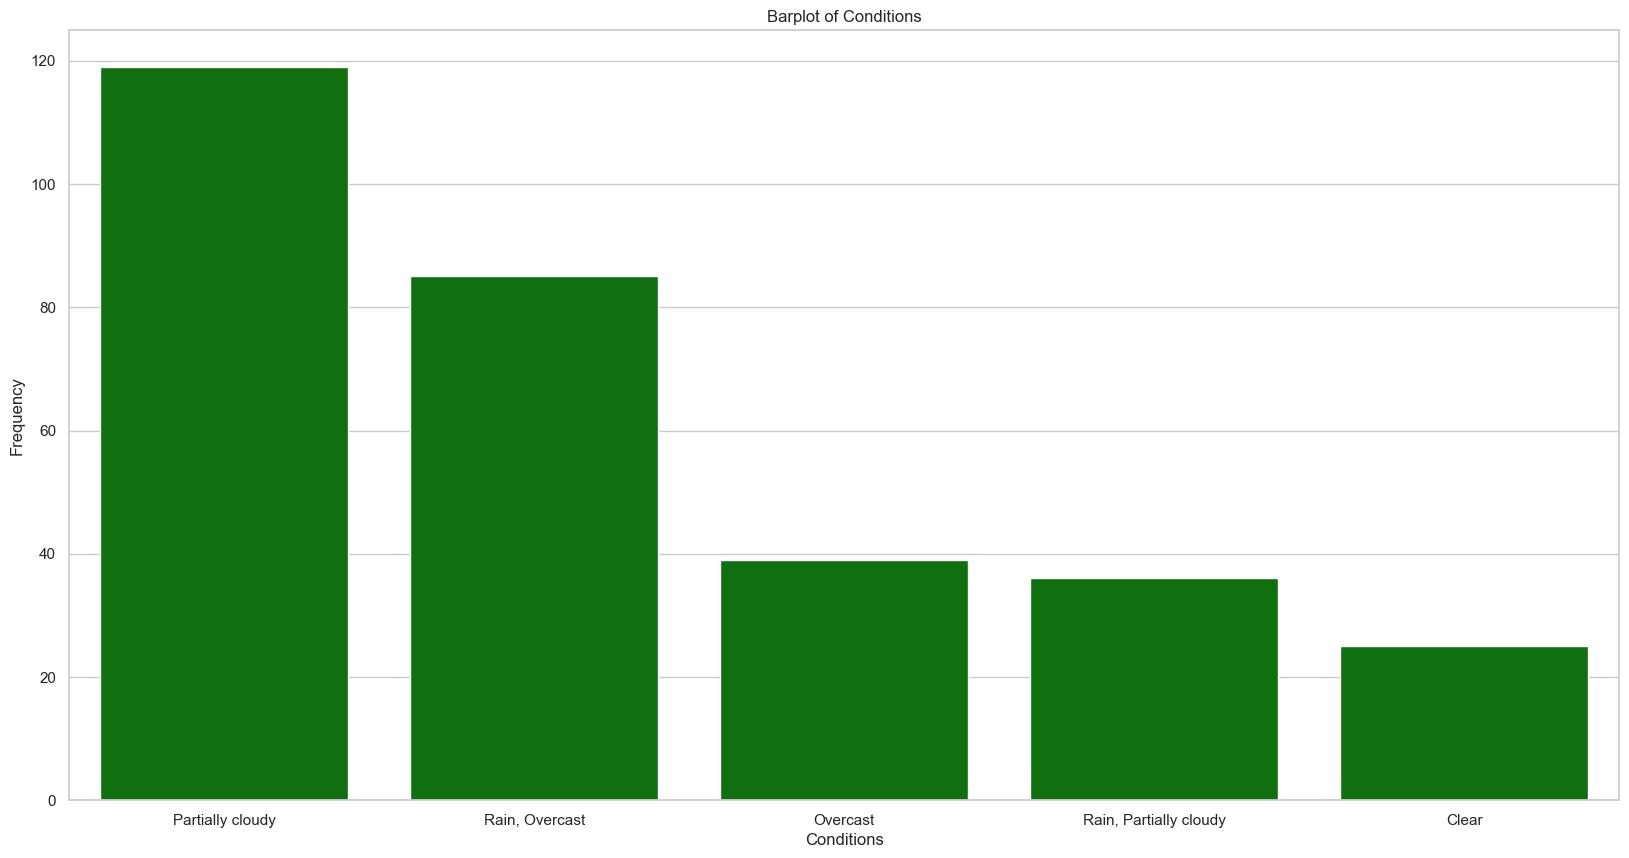

In [51]:
conditions_vals = data['conditions'].value_counts()

plt.figure(figsize=(20, 10))
sns.barplot(x=conditions_vals.index, y=conditions_vals.values, color='green')
plt.xlabel('Conditions')
plt.ylabel('Frequency')
plt.title('Barplot of Conditions')
plt.show()

In [55]:
data['conditions'].value_counts()

conditions
Partially cloudy          119
Rain, Overcast             85
Overcast                   39
Rain, Partially cloudy     36
Clear                      25
Name: count, dtype: int64

In [56]:
# encoding the conditon column into numerical values

conditions = {'Clear': 0, 'Partially cloudy': 1, 'Overcast': 2, 'Rain, Partially cloudy': 3, 'Rain, Overcast': 4}
data['conditions_enc'] = data['conditions'].map(conditions)
data

,datetime,temperature,dew_point,relative_humidity,wind_speed,precipitation,cloud_cover,conditions,value,conditions_enc
0,2023-01-01,11.0,7.9,82.24,14.2,0.10,47.7,"Rain, Partially cloudy",182.636277,3
1,2023-01-02,10.5,6.8,79.25,14.7,0.00,87.8,Overcast,182.636277,2
2,2023-01-03,15.1,11.3,78.49,28.5,0.00,90.7,Overcast,182.636277,2
3,2023-01-04,15.3,12.8,85.43,22.8,0.00,85.1,Overcast,182.636277,2
4,2023-01-05,13.5,7.8,70.43,20.2,0.00,75.8,Overcast,182.636277,2
...,...,...,...,...,...,...,...,...,...,...
299,2023-10-27,20.3,14.8,72.70,15.7,0.00,66.5,Partially cloudy,167.770644,1
300,2023-10-28,21.7,15.5,70.61,16.2,0.00,50.1,Partially cloudy,167.770644,1
301,2023-10-29,20.7,16.5,77.37,17.2,0.99,90.2,"Rain, Overcast",167.770644,4
302,2023-10-30,17.1,12.7,75.93,36.5,0.89,79.8,"Rain, Overcast",167.770644,4


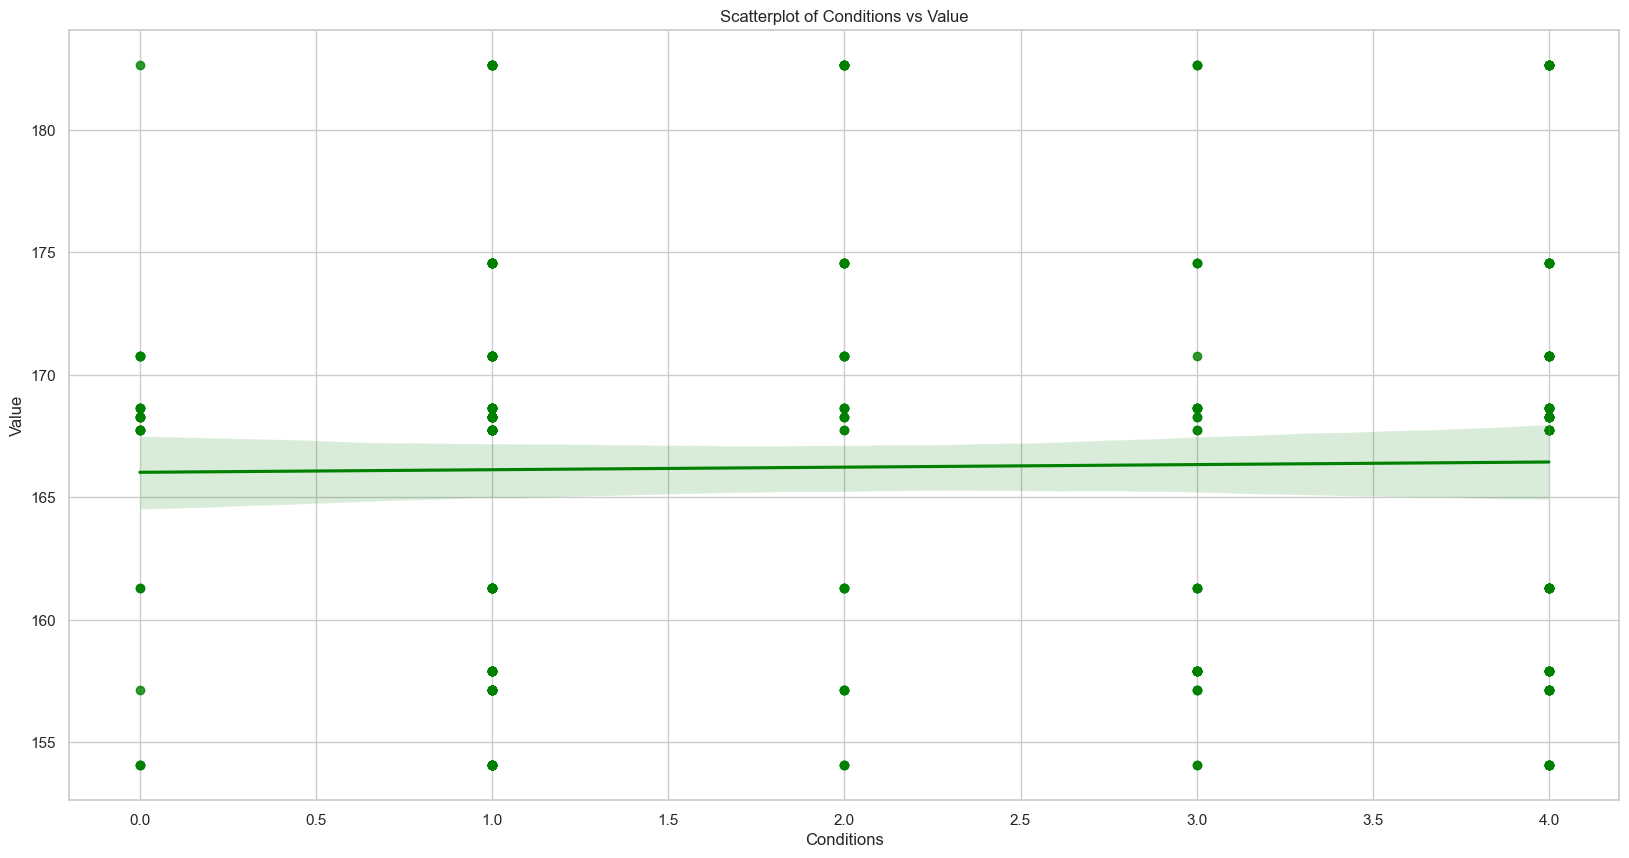

In [57]:
# plot the correlation between conditions_enc and value

plt.figure(figsize=(20, 10))
sns.regplot(x=data['conditions_enc'], y=data['value'], color='green')
plt.xlabel('Conditions')
plt.ylabel('Value')
plt.title('Scatterplot of Conditions vs Value')
plt.show()

# **Correlation Features to Target**

In [60]:
data_encoded = data.drop(['conditions'], axis = 1)

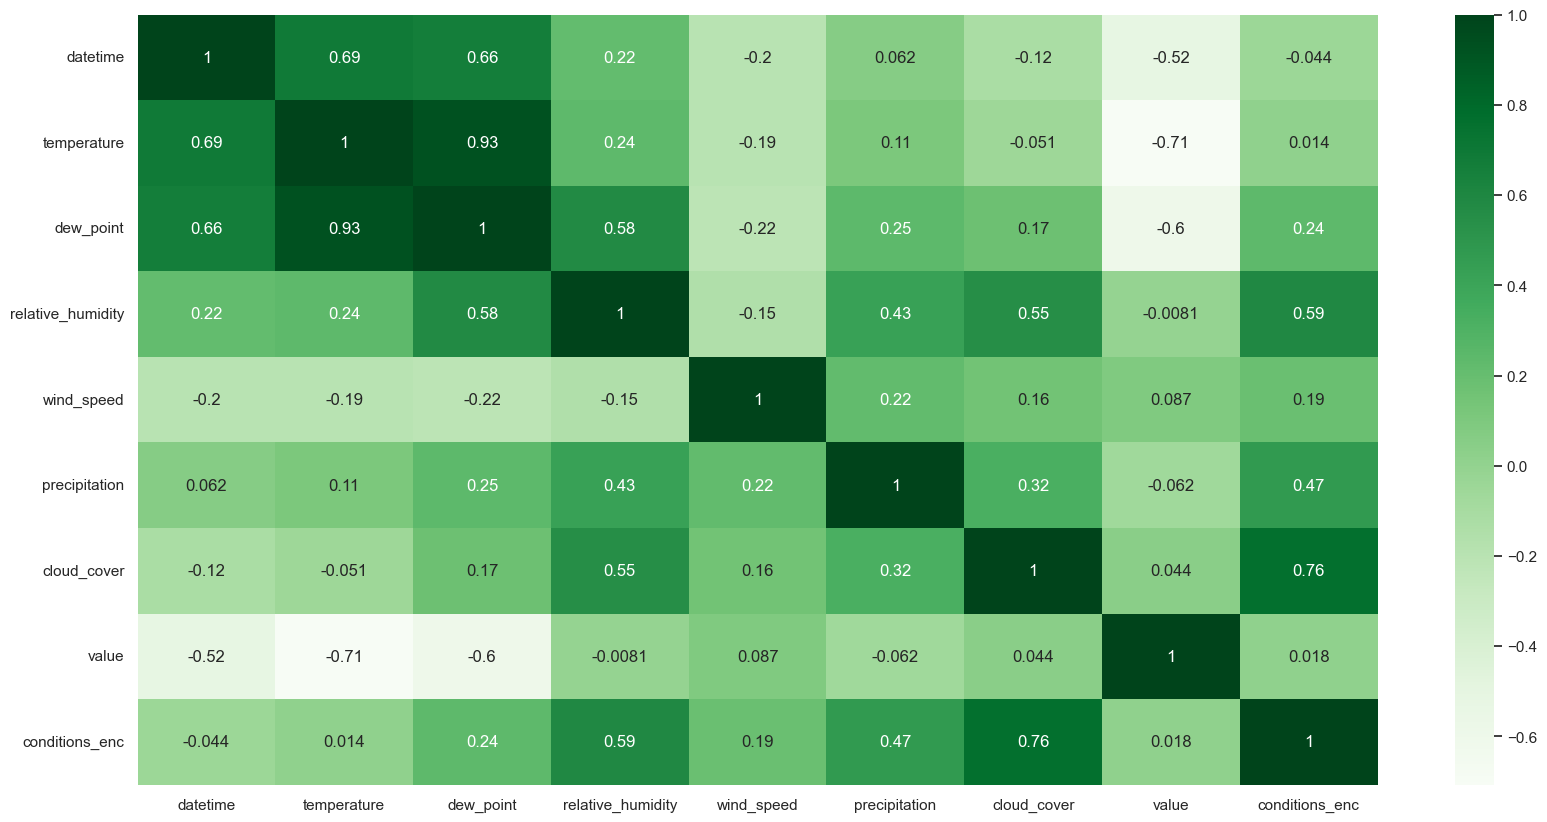

In [61]:
# heatmap of correlation between all the features and value, but exclude datetime and conditions

plt.figure(figsize=(20, 10))
sns.heatmap(data_encoded.corr(), annot=True, cmap='Greens')
plt.show()

# **data_encoded to csv**

In [66]:
# relocate the value column to the end

col_value = data_encoded.pop('value')
data_encoded.insert(len(data_encoded.columns), 'value', col_value)

In [67]:
# data_encoded to csv

data_encoded.to_csv('data_encoded.csv', index=False)

In [68]:
data_new = pd.read_csv('data_encoded.csv')
data_new.head()

,datetime,temperature,dew_point,relative_humidity,wind_speed,precipitation,cloud_cover,conditions_enc,value
0,2023-01-01,11.0,7.9,82.24,14.2,0.1,47.7,3,182.636277
1,2023-01-02,10.5,6.8,79.25,14.7,0.0,87.8,2,182.636277
2,2023-01-03,15.1,11.3,78.49,28.5,0.0,90.7,2,182.636277
3,2023-01-04,15.3,12.8,85.43,22.8,0.0,85.1,2,182.636277
4,2023-01-05,13.5,7.8,70.43,20.2,0.0,75.8,2,182.636277


In [69]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304 entries, 0 to 303
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   datetime           304 non-null    object 
 1   temperature        304 non-null    float64
 2   dew_point          304 non-null    float64
 3   relative_humidity  304 non-null    float64
 4   wind_speed         304 non-null    float64
 5   precipitation      304 non-null    float64
 6   cloud_cover        304 non-null    float64
 7   conditions_enc     304 non-null    int64  
 8   value              304 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 21.5+ KB


# *END OF NOTEBOOK*